# Project 3. Clustering and Manifold Learning

### Student ID: 915030521
### Student Name: Chenghan Sun

In [2]:
# Note: Do not change anything

import numpy as np
from numpy import genfromtxt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.image import imread

import os


%matplotlib inline

## Part 1. Image segmentation using $k$-means

Perform a segmentation analysis on the following photo. The data folder includes data.png (credit to WYM) along with $48$ feature files (and recall that the image itself has color information). Each feature contains certain information extracted from the image. The type of information (the features) extracted is different in every file. 

Provide two segmentation plots by using appropriate subsets of the features. At least one of them should identify all the pixels belonging to the face region, and the other one is up to you to choose. However, **you need explain your rational** (why did you use specific features etc.)

Hint: Carefully choose the features. To make an informed choice of features, use imshow to plot each feature to understand what features are extracted.

In [3]:
# import pkgs for Part 1
from sklearn.cluster import KMeans
plt.style.use('ggplot')

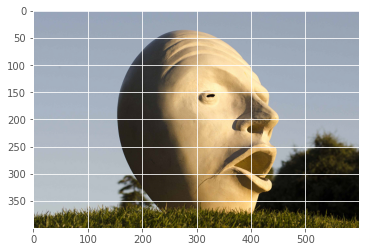

In [4]:
# load image
image = imread(os.getcwd()+'/data/data.png')
plt.imshow(image)

In [5]:
# load all the 48 features
def load_all_features(feature_path):
    arr = os.listdir(feature_path)
    feature_data_list = []
    for idx in range(len(arr)):
        each_path = feature_path + str(arr[idx])
        feature_data = pd.read_csv(each_path, header=None)
        feature_data_list.append(feature_data)
    return feature_data_list

In [6]:
feature_data_list = load_all_features('./data/features/')

# show the number of features
print(f"The numebr of total features = {len(feature_data_list)}")

The numebr of total features = 48


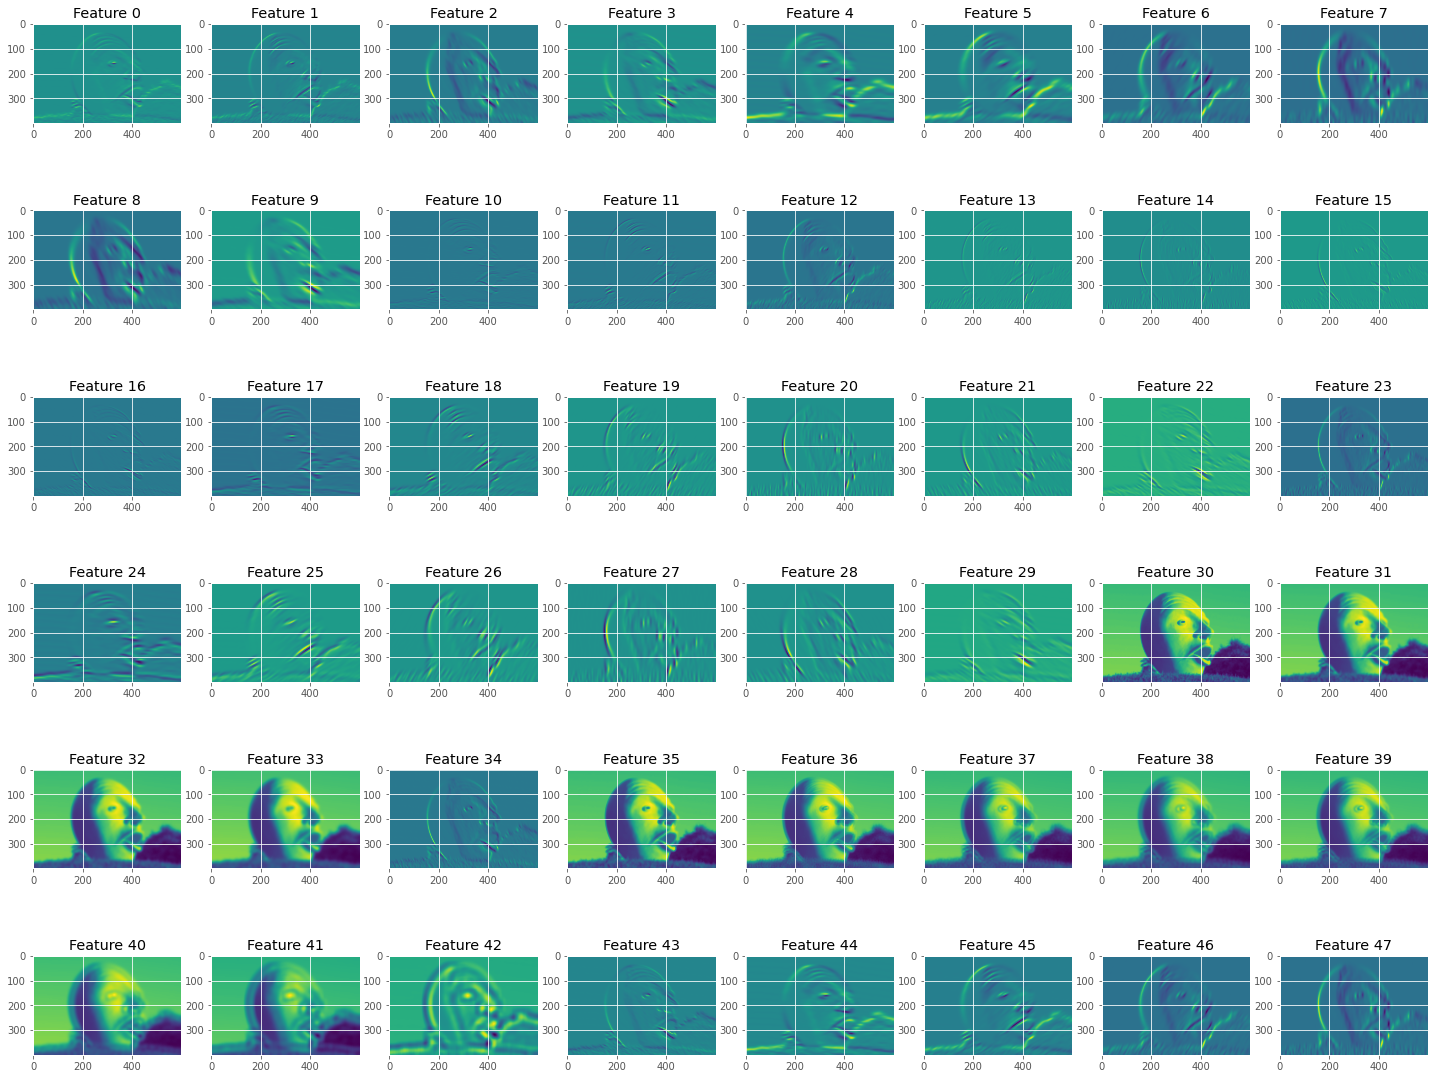

In [8]:
# visualize all the unit plot of features for feature selection
fig = plt.figure(figsize=(25,20))
for i in range(len(feature_data_list)):
    ax = fig.add_subplot(6, 8, i+1)
    ax.title.set_text(f'Feature {i}')
    ax.imshow(feature_data_list[i])

**Summary**: based on the 6x8 matrix plots above, for the two segmentation plots using appropriate subsets of the features:
- 1. For the first figure which should identify all the pixels belonging to the face region, I decided to choose the subset of feature space = {30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41} to construct the segmentation plot. The reason is that by the above visualization matrix, I identified this selected feature space has the capability to capture most of the facial identities (including the facial expressions). 
- 2. For the second figure that capture an identity up to my choose, I choose the subset of feature space = {2, 3, 4, 5, 6, 7, 8, 9, 42, 44, 45, 46, 47} to extract the profile of the face, grass, and forest. 

In [7]:
def feature_extractor(feature_space, feature_idx):
    sel_fea_d = dict()
    for idx in feature_idx:
        sel_fea = np.array(feature_space[idx])
        sel_fea = sel_fea.reshape(-1, )
        sel_fea_d[f'fea{idx}'] = sel_fea
    re_feature = pd.DataFrame(data=sel_fea_d)
    return re_feature

In [8]:
# For the first segmentation plot
feature_idx = [30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41]
final_features = feature_extractor(feature_data_list, feature_idx)
final_features.head()

fea30        fea31        fea32        fea33       fea35       fea36  \
0  581.361694  1162.526489  1743.621948  2324.843994  290.665863  145.265991   
1  581.359802  1162.526855  1743.612061  2324.792725  290.660492  145.267685   
2  581.358582  1162.525269  1743.586548  2324.719727  290.657288  145.267303   
3  581.359009  1162.517334  1743.536865  2324.622070  290.656647  145.262894   
4  581.357544  1162.495117  1743.453735  2324.497559  290.650269  145.251892   

       fea37      fea38      fea39      fea40      fea41  
0  96.859474  72.638931  96.859474  44.720596  14.236095  
1  96.854568  72.632851  96.854568  44.717632  14.236082  
2  96.847450  72.626884  96.847450  44.714973  14.236050  
3  96.838554  72.621628  96.838554  44.711678  14.234132  
4  96.829178  72.617775  96.829178  44.709370  14.233518

In [9]:
# construct K-means model by tuned parameters
kmeans_cluster = KMeans(n_clusters=5)
kmeans_cluster.fit(final_features)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

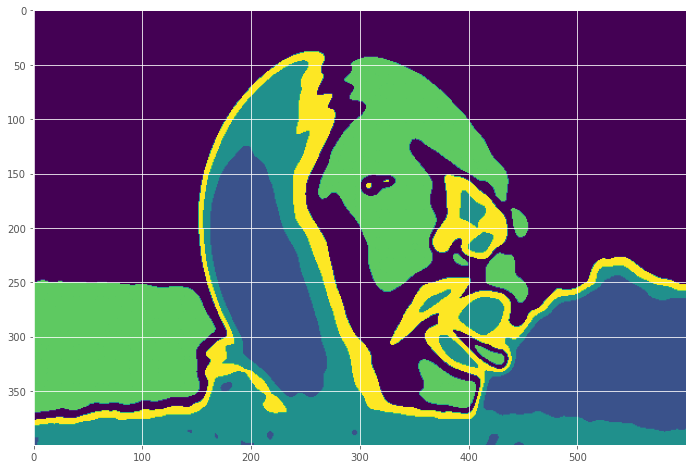

In [10]:
# plot the features 
plt.figure(figsize = (15, 8))
plt.imshow(cluster_labels.reshape(400, 600))

In [11]:
# For the second segmentation plot
feature_idx_2 = [2, 3, 4, 5, 6, 7, 8, 9, 42, 44, 45, 46, 47]
final_features_2 = feature_extractor(feature_data_list, feature_idx_2)
final_features_2.head()

fea2      fea3      fea4      fea5      fea6      fea7      fea8  \
0  0.003057 -0.001338  0.004182 -0.012193 -0.004609  0.005987  0.013746   
1  0.007327 -0.001119  0.003560 -0.012814 -0.003420  0.006118  0.015303   
2  0.012035 -0.000874  0.002965 -0.013560 -0.002498  0.006842  0.016999   
3  0.016156 -0.000423  0.001855 -0.014090 -0.001925  0.008618  0.018671   
4  0.018828  0.000464  0.001298 -0.015001 -0.001882  0.011725  0.020198   

       fea9     fea42     fea44     fea45     fea46     fea47  
0  0.008798  0.815234  0.010646  0.009833 -0.003512  0.004082  
1  0.009076  0.815650  0.009352  0.009831 -0.001169  0.000953  
2  0.009443  0.816021  0.007982  0.009475  0.001718 -0.003215  
3  0.009725  0.815340  0.006414  0.008718  0.004897 -0.006464  
4  0.010052  0.815342  0.004942  0.007356  0.007855 -0.006206

In [12]:
# construct K-means model by tuned parameters
kmeans_cluster_2 = KMeans(n_clusters=4)
kmeans_cluster_2.fit(final_features_2)
cluster_centers_2 = kmeans_cluster_2.cluster_centers_
cluster_labels_2 = kmeans_cluster_2.labels_

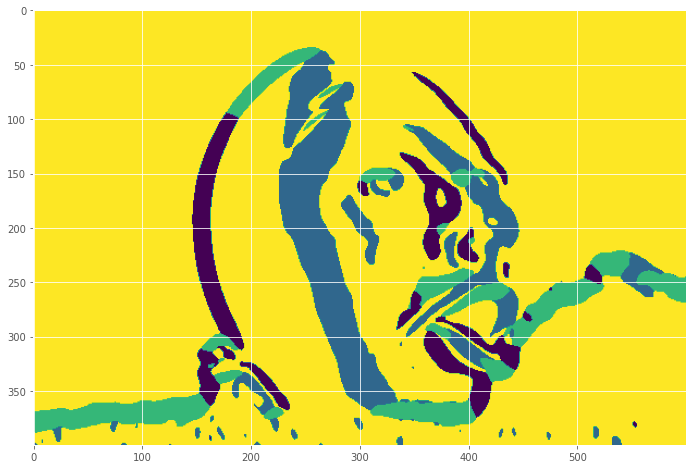

In [13]:
# plot the features 
plt.figure(figsize = (15, 8))
plt.imshow(cluster_labels_2.reshape(400, 600))

## Part 2. mean-shift path

Plot the mean shift path for the attached dataset mean_shift.csv.

In [14]:
# load dataset for this section
from IPython import display

In [15]:
# load dataset for Part 2
mean_shift_df = pd.read_csv('./data/mean_shift.csv', header=None)
print(f"The dimension of mean_shift.csv dataset = {mean_shift_df.shape}")

The dimension of mean_shift.csv dataset = (180, 2)


In [16]:
mean_shift_data = np.array(mean_shift_df)

# label the data
label_1 = np.ones(60,int)
label_2 = np.ones(60,int)*2
label_3 = np.ones(60,int)*3

# concatenate all labels
label_all = np.concatenate((label_1, label_2, label_3))

In [17]:
# define some helper functions
# cited from Mean Shift Clustering, STA142B, UC Davis, W. Polonik

def psi(x,tuning):
    temp = np.exp(-tuning*np.sum(np.square(x)))
    return(temp)

def weights_sum(old_point,tuning,neighbors):
    Temp = 0
    for row in neighbors: 
        Temp += psi(np.array(old_point) - row,tuning)
    return(Temp)

def new_point(old_point,tuning,neighbors):
    z = np.array([0,0])
    w = 0
    sum_ = weights_sum(old_point,tuning,neighbors)
    for row in neighbors:
        w = psi(np.array(old_point) - row,tuning) / sum_ 
        z = z + w*np.array(row)
        #print(w)
    return(z)

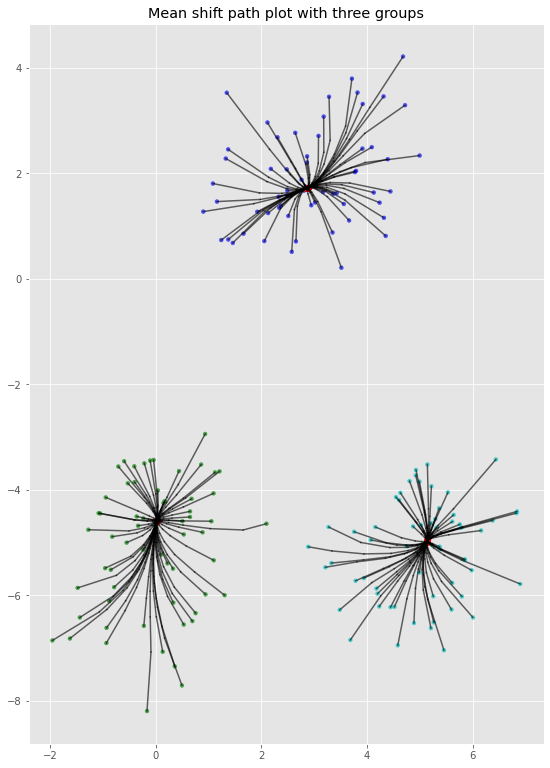

In [18]:
# plot the mean shift path for the attached dataset mean_shift.csv.
# Cited from Mean Shift Clustering, STA142B, UC Davis, W. Polonik

bandwidth = 1.5
tuning = 1/bandwidth**2

not_converge = True

fig = plt.figure(figsize = (10, 10))
ax=fig.add_axes([0,0,1,1], title = 'Mean shift path plot with three groups')
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(mean_shift_data[:,0], mean_shift_data[:,1],c = label_all, 
           cmap = colors.ListedColormap(['g','black','b','m', 'c']),alpha=0.6, s = 15)

for row in mean_shift_data:
    not_converge = True
    old_pt = row
    while not_converge:
        new_pt = new_point(old_pt,tuning,mean_shift_data)
        ax.plot([old_pt[0],new_pt[0]], [old_pt[1],new_pt[1]],color = 'black',alpha=0.6)
        not_converge = np.sum(np.square(old_pt - new_pt)) > 0.0001
        if not_converge == False:
            ax.scatter(new_pt[0], new_pt[1],color = 'red' , marker = 'o', s = 30)
        old_pt = new_pt

## Part 3. Comparing different clustering methods

Perform clustering task on the dataset comparing_cluster_methods.csv. Use DBSCAN, k-means and mean shift. Plot and compare the results. Find the methods that are able to seperate the three clusters (of course one needs to find a good tuning parameter by trial-and-error to get the perfect result), and explain why they are able to do so and why the remaining methods are not able to.

In [19]:
# load packages needed for Part 3
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

In [20]:
# load dataset for Part 3
clustering_data = pd.read_csv('./data/comparing_cluster_methods.csv', header=None)
print(clustering_data.shape)

(1600, 2)


### Perform clustering method: DBSCAN 

In [21]:
# Perform clustering method: DBSCAN 

DBSCAN_model = DBSCAN(eps = 0.25, min_samples = 10, metric='euclidean')
DBSCAN_pred = DBSCAN_model.fit(clustering_data)
DBSCAN_labels = DBSCAN_pred.labels_
DBSCAN_n_clusters = len(np.unique(DBSCAN_labels))
print(f'DBSCAN: predicted number of clusters = {DBSCAN_n_clusters}')

DBSCAN: predicted number of clusters = 3


### Perform clustering method: K-means 

In [22]:
# Perform clustering method: K-means 

kmeans_model = KMeans(n_clusters = 3, max_iter = 500, tol = 0.0001)
kmeans_pred = kmeans_model.fit(clustering_data)
kmeans_labels = kmeans_pred.labels_
kmeans_n_clusters = len(np.unique(kmeans_labels))
print(f'K-Means: predicted number of clusters = {kmeans_n_clusters}')

K-Means: predicted number of clusters = 3


### Perform clustering method: mean shift

In [23]:
# Perform clustering method: mean shift

bandwidth = estimate_bandwidth(clustering_data, quantile = 0.2, n_samples = 500)
MeanShift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
MeanShift_pred = MeanShift_model.fit(clustering_data)
MeanShift_labels = MeanShift_pred.labels_
MeanShift_n_clusters = len(np.unique(MeanShift_labels))
print(f'Mean Shift: predicted number of clusters = {MeanShift_n_clusters}')

Mean Shift: predicted number of clusters = 3


### Summarize all the plots

Text(0.5, 1.0, 'MeanShift: Clustering Visualization')

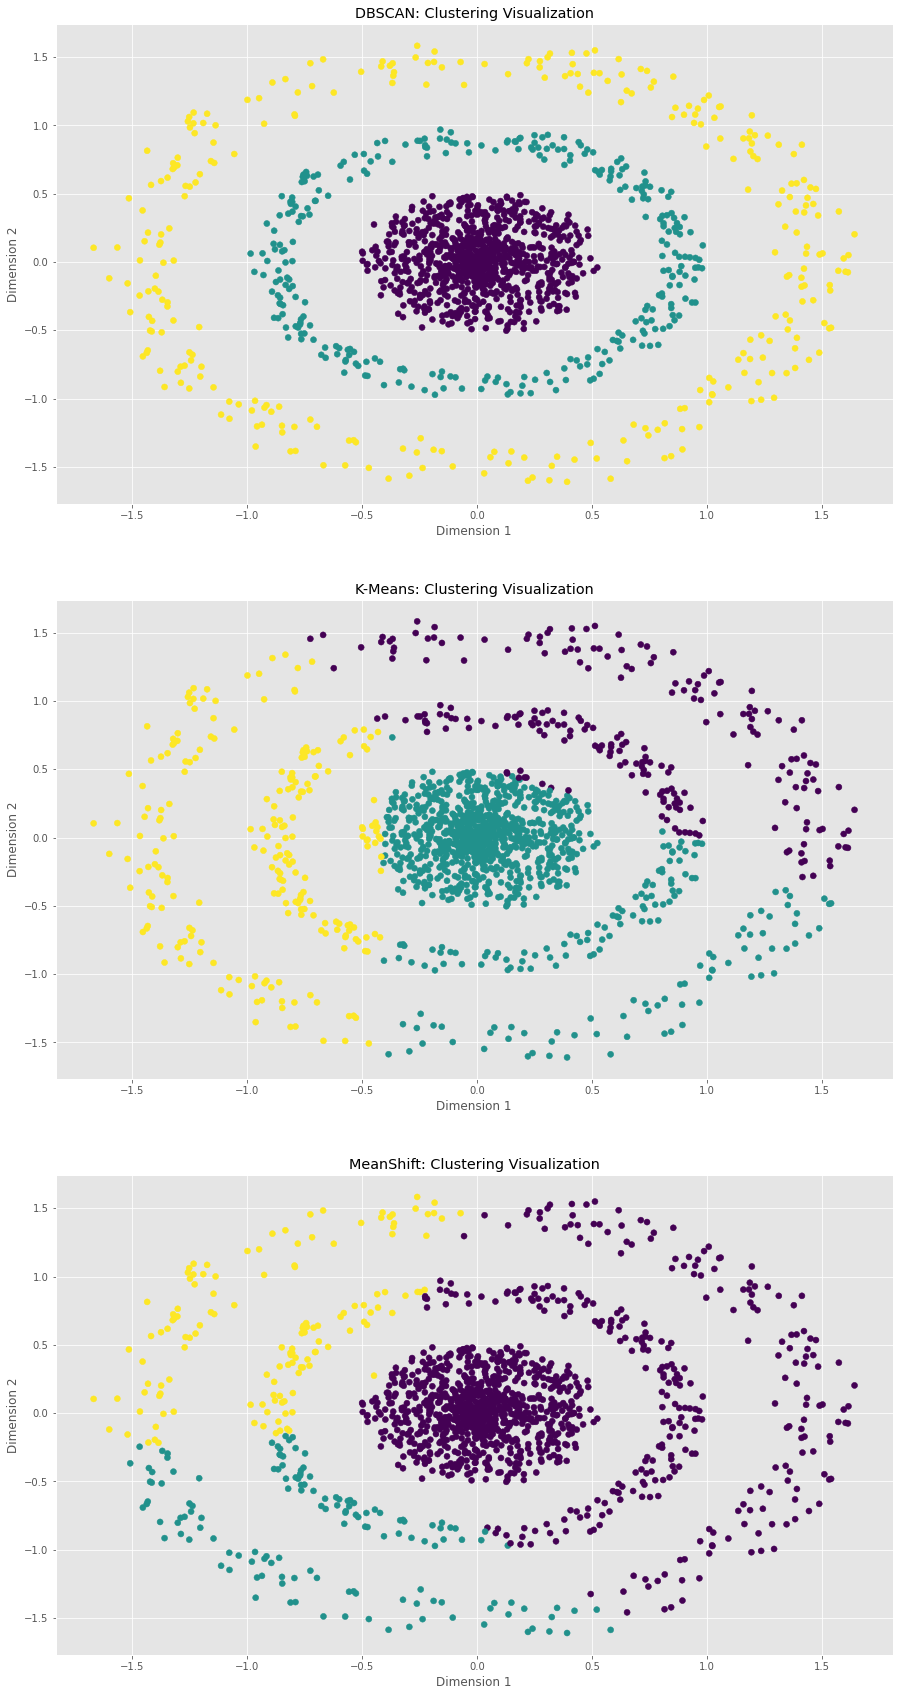

In [24]:
dim_data_1 = clustering_data[0]
dim_data_2 = clustering_data[1]
plt.figure(figsize = (15, 30))
plt.subplot(3, 1, 1)
plt.scatter(dim_data_1, dim_data_2, marker='o', c = DBSCAN_labels)
plt.xlabel("Dimension 1", size=12)
plt.ylabel("Dimension 2", size=12)
plt.title("DBSCAN: Clustering Visualization")

plt.subplot(3, 1, 2)
plt.scatter(dim_data_1, dim_data_2, marker='o', c = kmeans_labels)
plt.xlabel("Dimension 1", size=12)
plt.ylabel("Dimension 2", size=12)
plt.title("K-Means: Clustering Visualization")

plt.subplot(3, 1, 3)
plt.scatter(dim_data_1, dim_data_2, marker='o', c = MeanShift_labels)
plt.xlabel("Dimension 1", size=12)
plt.ylabel("Dimension 2", size=12)
plt.title("MeanShift: Clustering Visualization")

### Report Silhouette Scores

In [25]:
print(f'DBSCAN: Silhouette Coefficient = {silhouette_score(clustering_data, DBSCAN_labels)}')
print(f'K-Means: Silhouette Coefficient = {silhouette_score(clustering_data, kmeans_labels)}')
print(f'MeanShift: Silhouette Coefficient = {silhouette_score(clustering_data, MeanShift_labels)}')

DBSCAN: Silhouette Coefficient = 0.3059720807471287
K-Means: Silhouette Coefficient = 0.43515508691935567
MeanShift: Silhouette Coefficient = 0.44034283078371755


**Summary**: 

First of all, it observed that all the methods were able to seperate the three clusters. 

- 1. Based on the plot, DBSCAN worked the best in order to perfrom the clustering method. That is because the DBSCAN would be able to capture the data distribution of low density regions. Thus, for the empty regions between the concentric circles, DBSCAN showed superior clustering performance on this uniformly distributed data. 

- 2. Based on the plot, K-Means showed worse performance than DBSCAN. Since K-Means won't be able to recognize the ring shape as the concentric circles are not convex.

- 3. Based on the plot, Mean Shift also showed worse performance than DBSCAN. Since the data is uniformly sampled (based on the data distribution of plots), no peak would be available to be captured by Mean Shift. 

- 4. By definition, the Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. However, the reported Silhouette Coefficient won't reflect the true clustering effectiveness, as the concentric circles are not convex.

## Part 4. Shape learning

Use any method to recover the shape of datasets 1~5. Provide the methods and describe the shape by both plots and words. The difficulty is ranked in order. We do not expect you to solve all the problems. 

Hint: for 3d plots, one can also plot it in python (outside the jupyter notebook environment) in order to change the viewing angles to have a better visual impression.

Hint: MDS and locally linear embedding are the ways to go for higher dimension data.

In [26]:
# load packages for Part 4
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

In [27]:
# load data for Part 4
shape_data_1 = pd.read_csv('./data/dataset1.csv', header=None)
print(f"Shape of the dataset 1 = {shape_data_1.shape}")

shape_data_2 = pd.read_csv('./data/dataset2.csv', header=None)
print(f"Shape of the dataset 2 = {shape_data_2.shape}")

shape_data_3 = pd.read_csv('./data/dataset3.csv', header=None)
print(f"Shape of the dataset 3 = {shape_data_3.shape}")

shape_data_4 = pd.read_csv('./data/dataset4.csv', header=None)
print(f"Shape of the dataset 4 = {shape_data_4.shape}")

shape_data_5 = pd.read_csv('./data/dataset5.csv', header=None)
print(f"Shape of the dataset 5 = {shape_data_5.shape}")

print("We can see that dataset 4 had the largest dimension")

Shape of the dataset 1 = (800, 2)
Shape of the dataset 2 = (1000, 3)
Shape of the dataset 3 = (900, 3)
Shape of the dataset 4 = (1000, 9)
Shape of the dataset 5 = (1000, 3)
We can see that dataset 4 had the largest dimension


In [28]:
# define some helper functions for visualization
# cited from Non-linear dimension reduction (MDS); STA142B, UC Davis, W. Polonik

def annotate_df(row):  
    ax1.annotate(row.name, row.values,
                size=10,
                color='darkslategrey')
    
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''
    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

Dataset 1.

In [29]:
# MDS shape learning
# Partially cited from Non-linear dimension reduction (MDS); STA142B, UC Davis, W. Polonik

MDS_embedding_1 = MDS(n_components=2, n_init=10, max_iter=500)
MDS_pred_1 = MDS_embedding_1.fit_transform(shape_data_1)
MDS_coords_Sym_1 = pd.DataFrame(MDS_pred_1, index=shape_data_1.index, columns=['p1','p2'])

In [30]:
# LLE shape learning

LLE_embedding_1 = LLE(n_components=2, n_neighbors=100)
LLE_pred_1 = LLE_embedding_1.fit_transform(shape_data_1)
LLE_coords_Sym_1 = pd.DataFrame(LLE_pred_1, index=shape_data_1.index, columns=['p1','p2'])

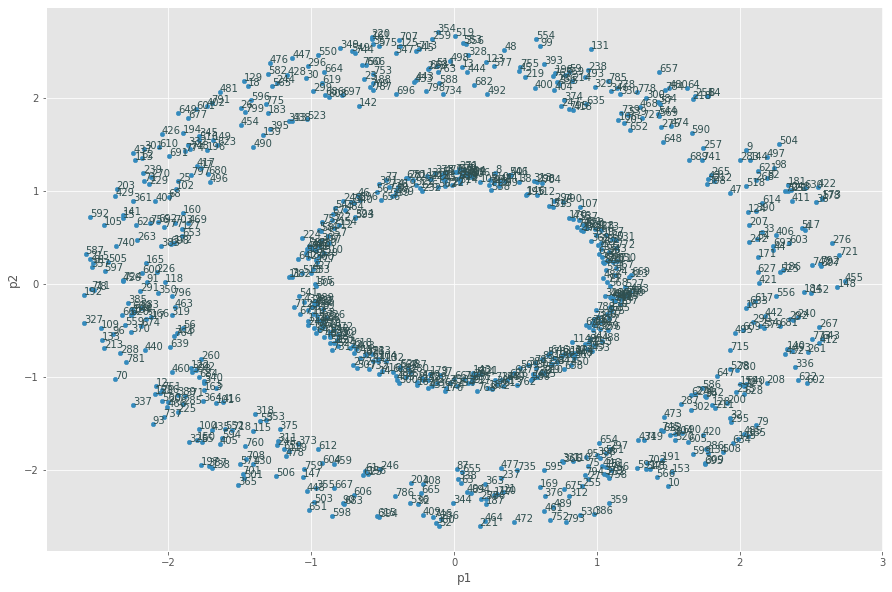

In [31]:
# MDS shape visualization

ax1 = MDS_coords_Sym_1.plot('p1','p2', kind='scatter', figsize=(15, 10))
notshow = MDS_coords_Sym_1.apply(annotate_df, axis=1)

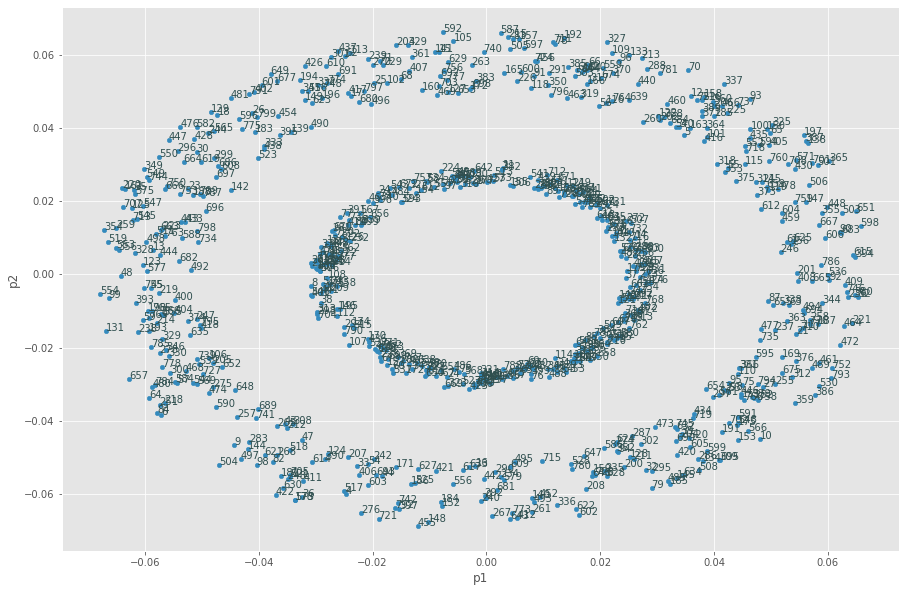

In [32]:
# LLE shape visualization

ax1 = LLE_coords_Sym_1.plot('p1','p2', kind='scatter', figsize=(15, 10))
notshow = LLE_coords_Sym_1.apply(annotate_df, axis=1)

**Dataset 1 Summary**:

Both LLE and MDS would be able to retrieve the shape of the data as **concentric circles**.

Dataset 2.

In [33]:
# MDS shape learning

MDS_embedding_2 = MDS(n_components=3, n_init=10, max_iter=500)
MDS_pred_2 = MDS_embedding_2.fit_transform(shape_data_2)
MDS_coords_Sym_2 = pd.DataFrame(MDS_pred_2, index=shape_data_2.index, columns=['p1','p2','p3'])

In [34]:
# LLE shape learning

LLE_embedding_2 = LLE(n_components=3, n_neighbors=100)
LLE_pred_2 = LLE_embedding_2.fit_transform(shape_data_2)
LLE_coords_Sym_2 = pd.DataFrame(LLE_pred_2, index=shape_data_2.index, columns=['p1','p2','p3'])

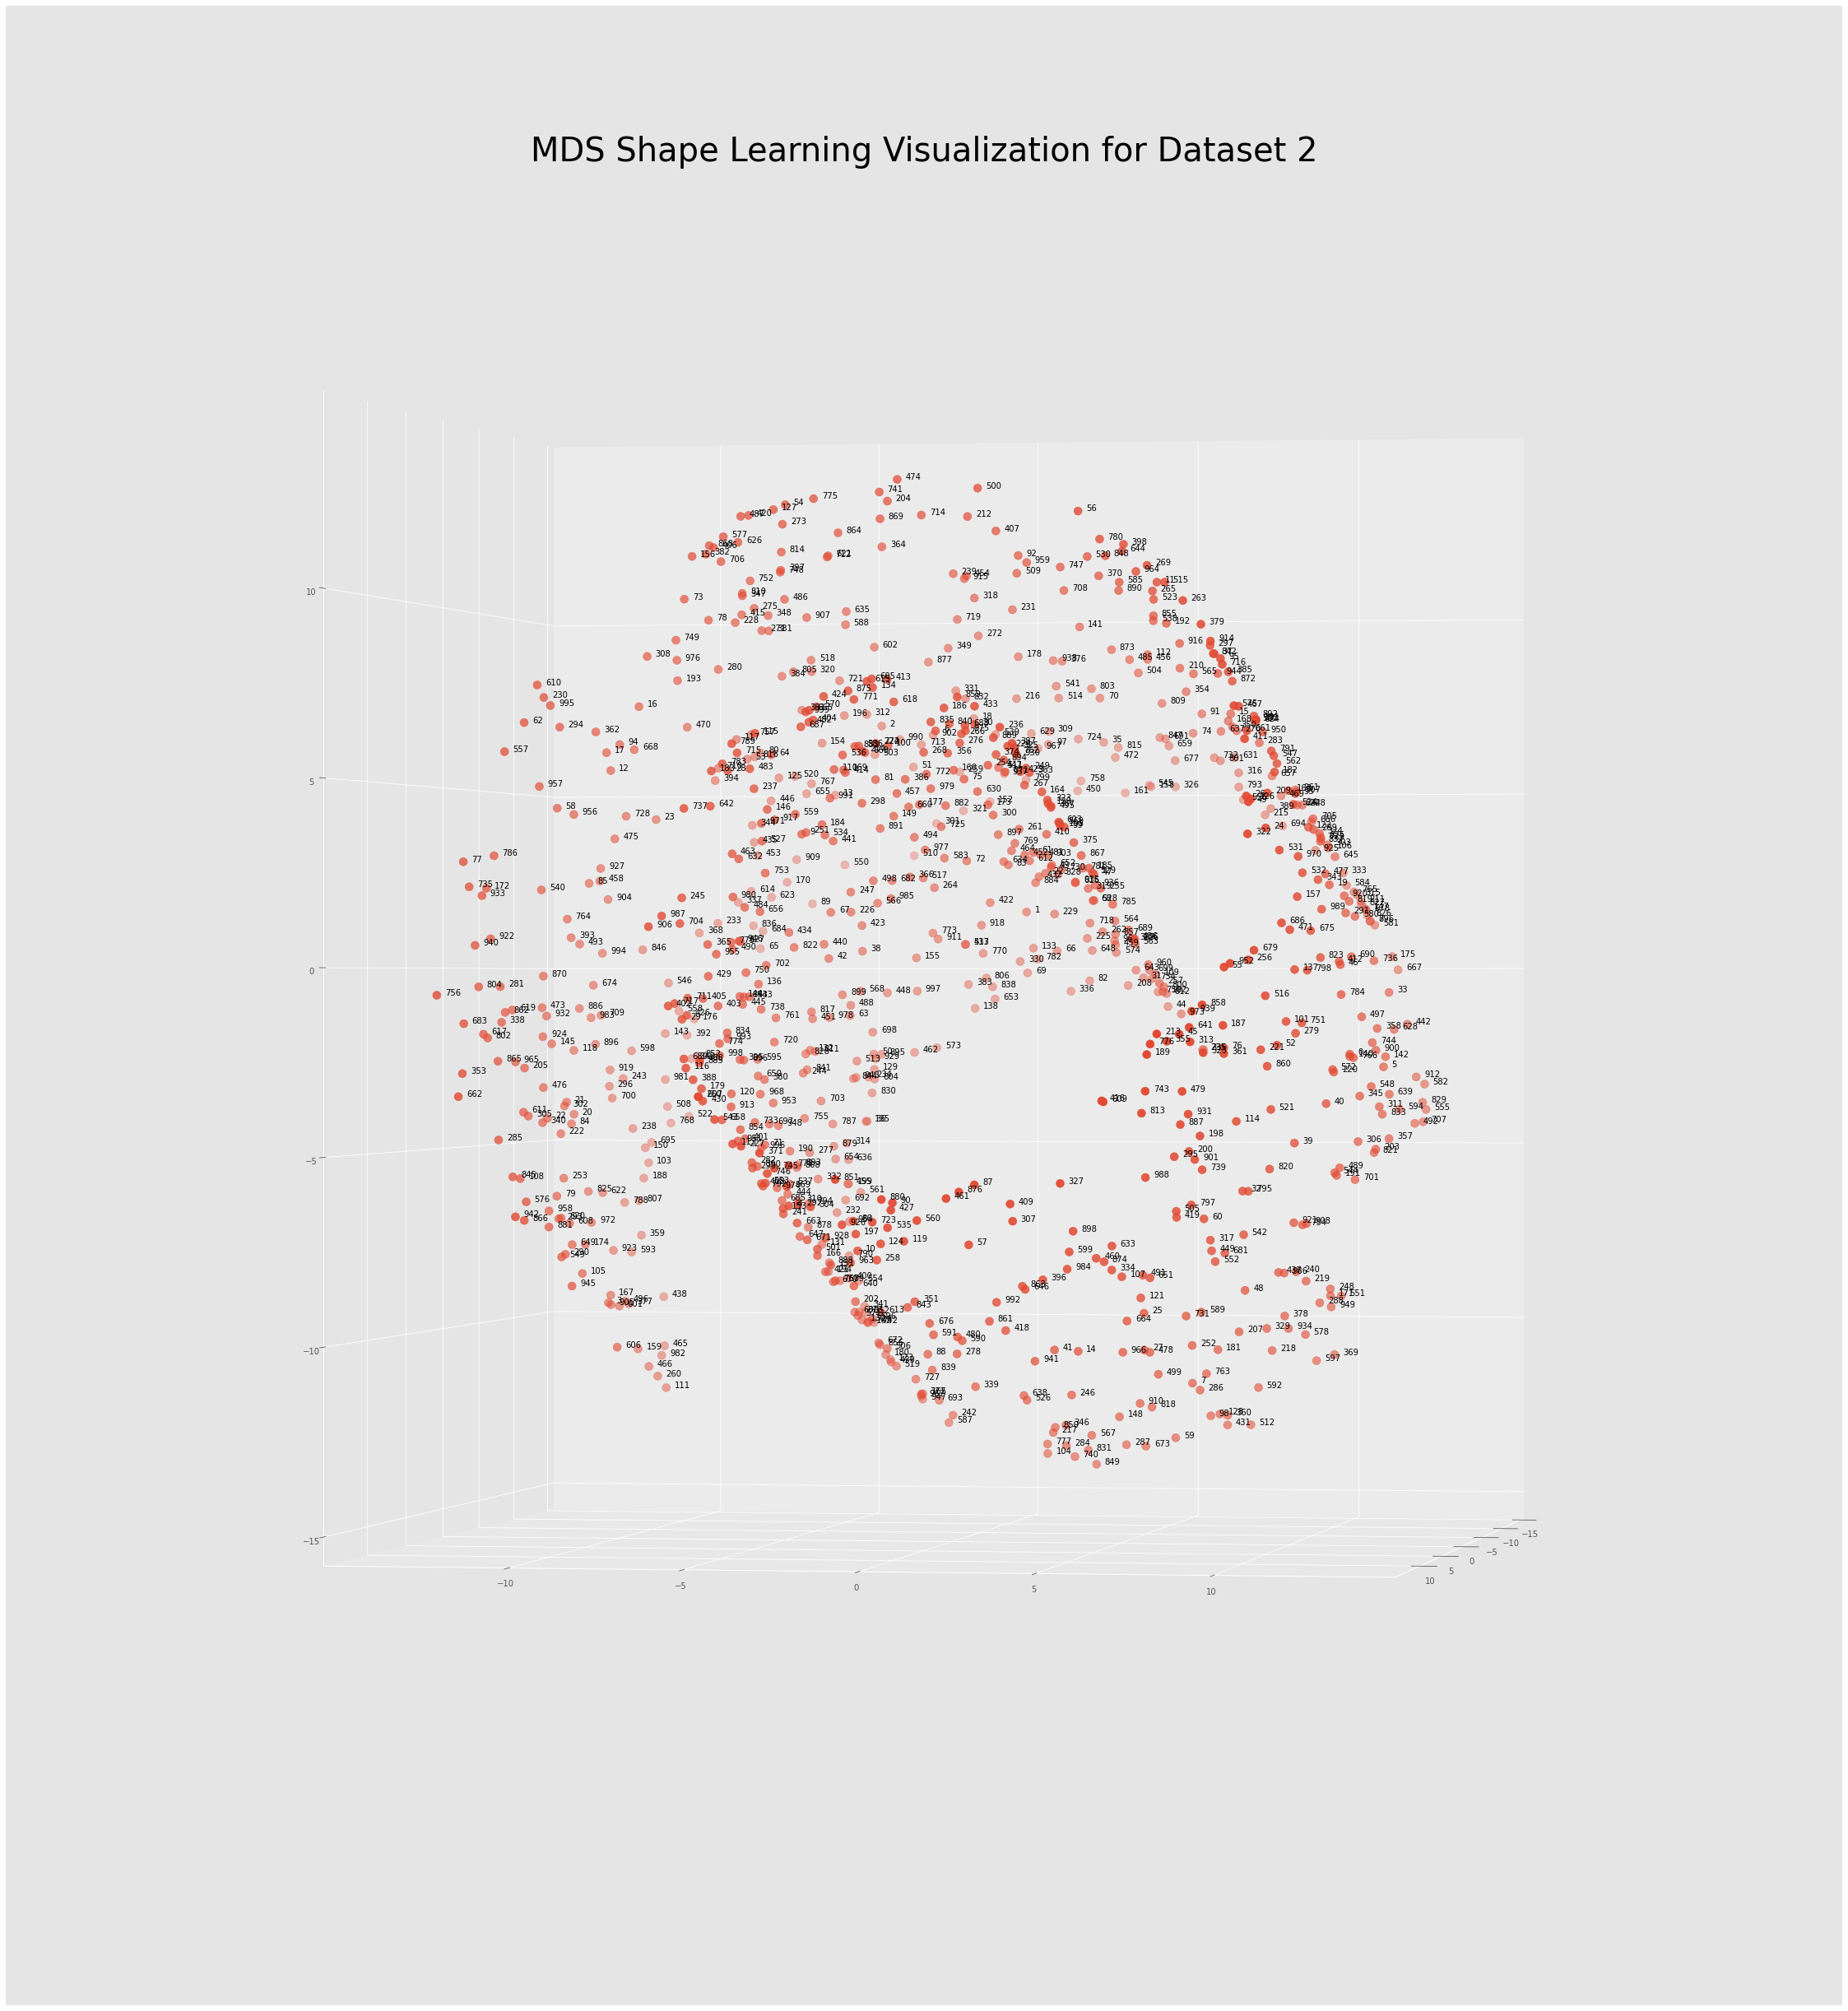

In [35]:
# MDS shape visualization
# cited from Non-linear dimension reduction (MDS); STA142B, UC Davis, W. Polonik

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(50)
fig.set_figwidth(40)

ax.view_init(elev=0, azim=10)

fig.subplots_adjust(top=0.8)

x = pd.Series(MDS_coords_Sym_2['p1'])
y = pd.Series(MDS_coords_Sym_2['p2'])
z = pd.Series(MDS_coords_Sym_2['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('MDS Shape Learning Visualization for Dataset 2', fontsize=40)

for k, v  in MDS_coords_Sym_2.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

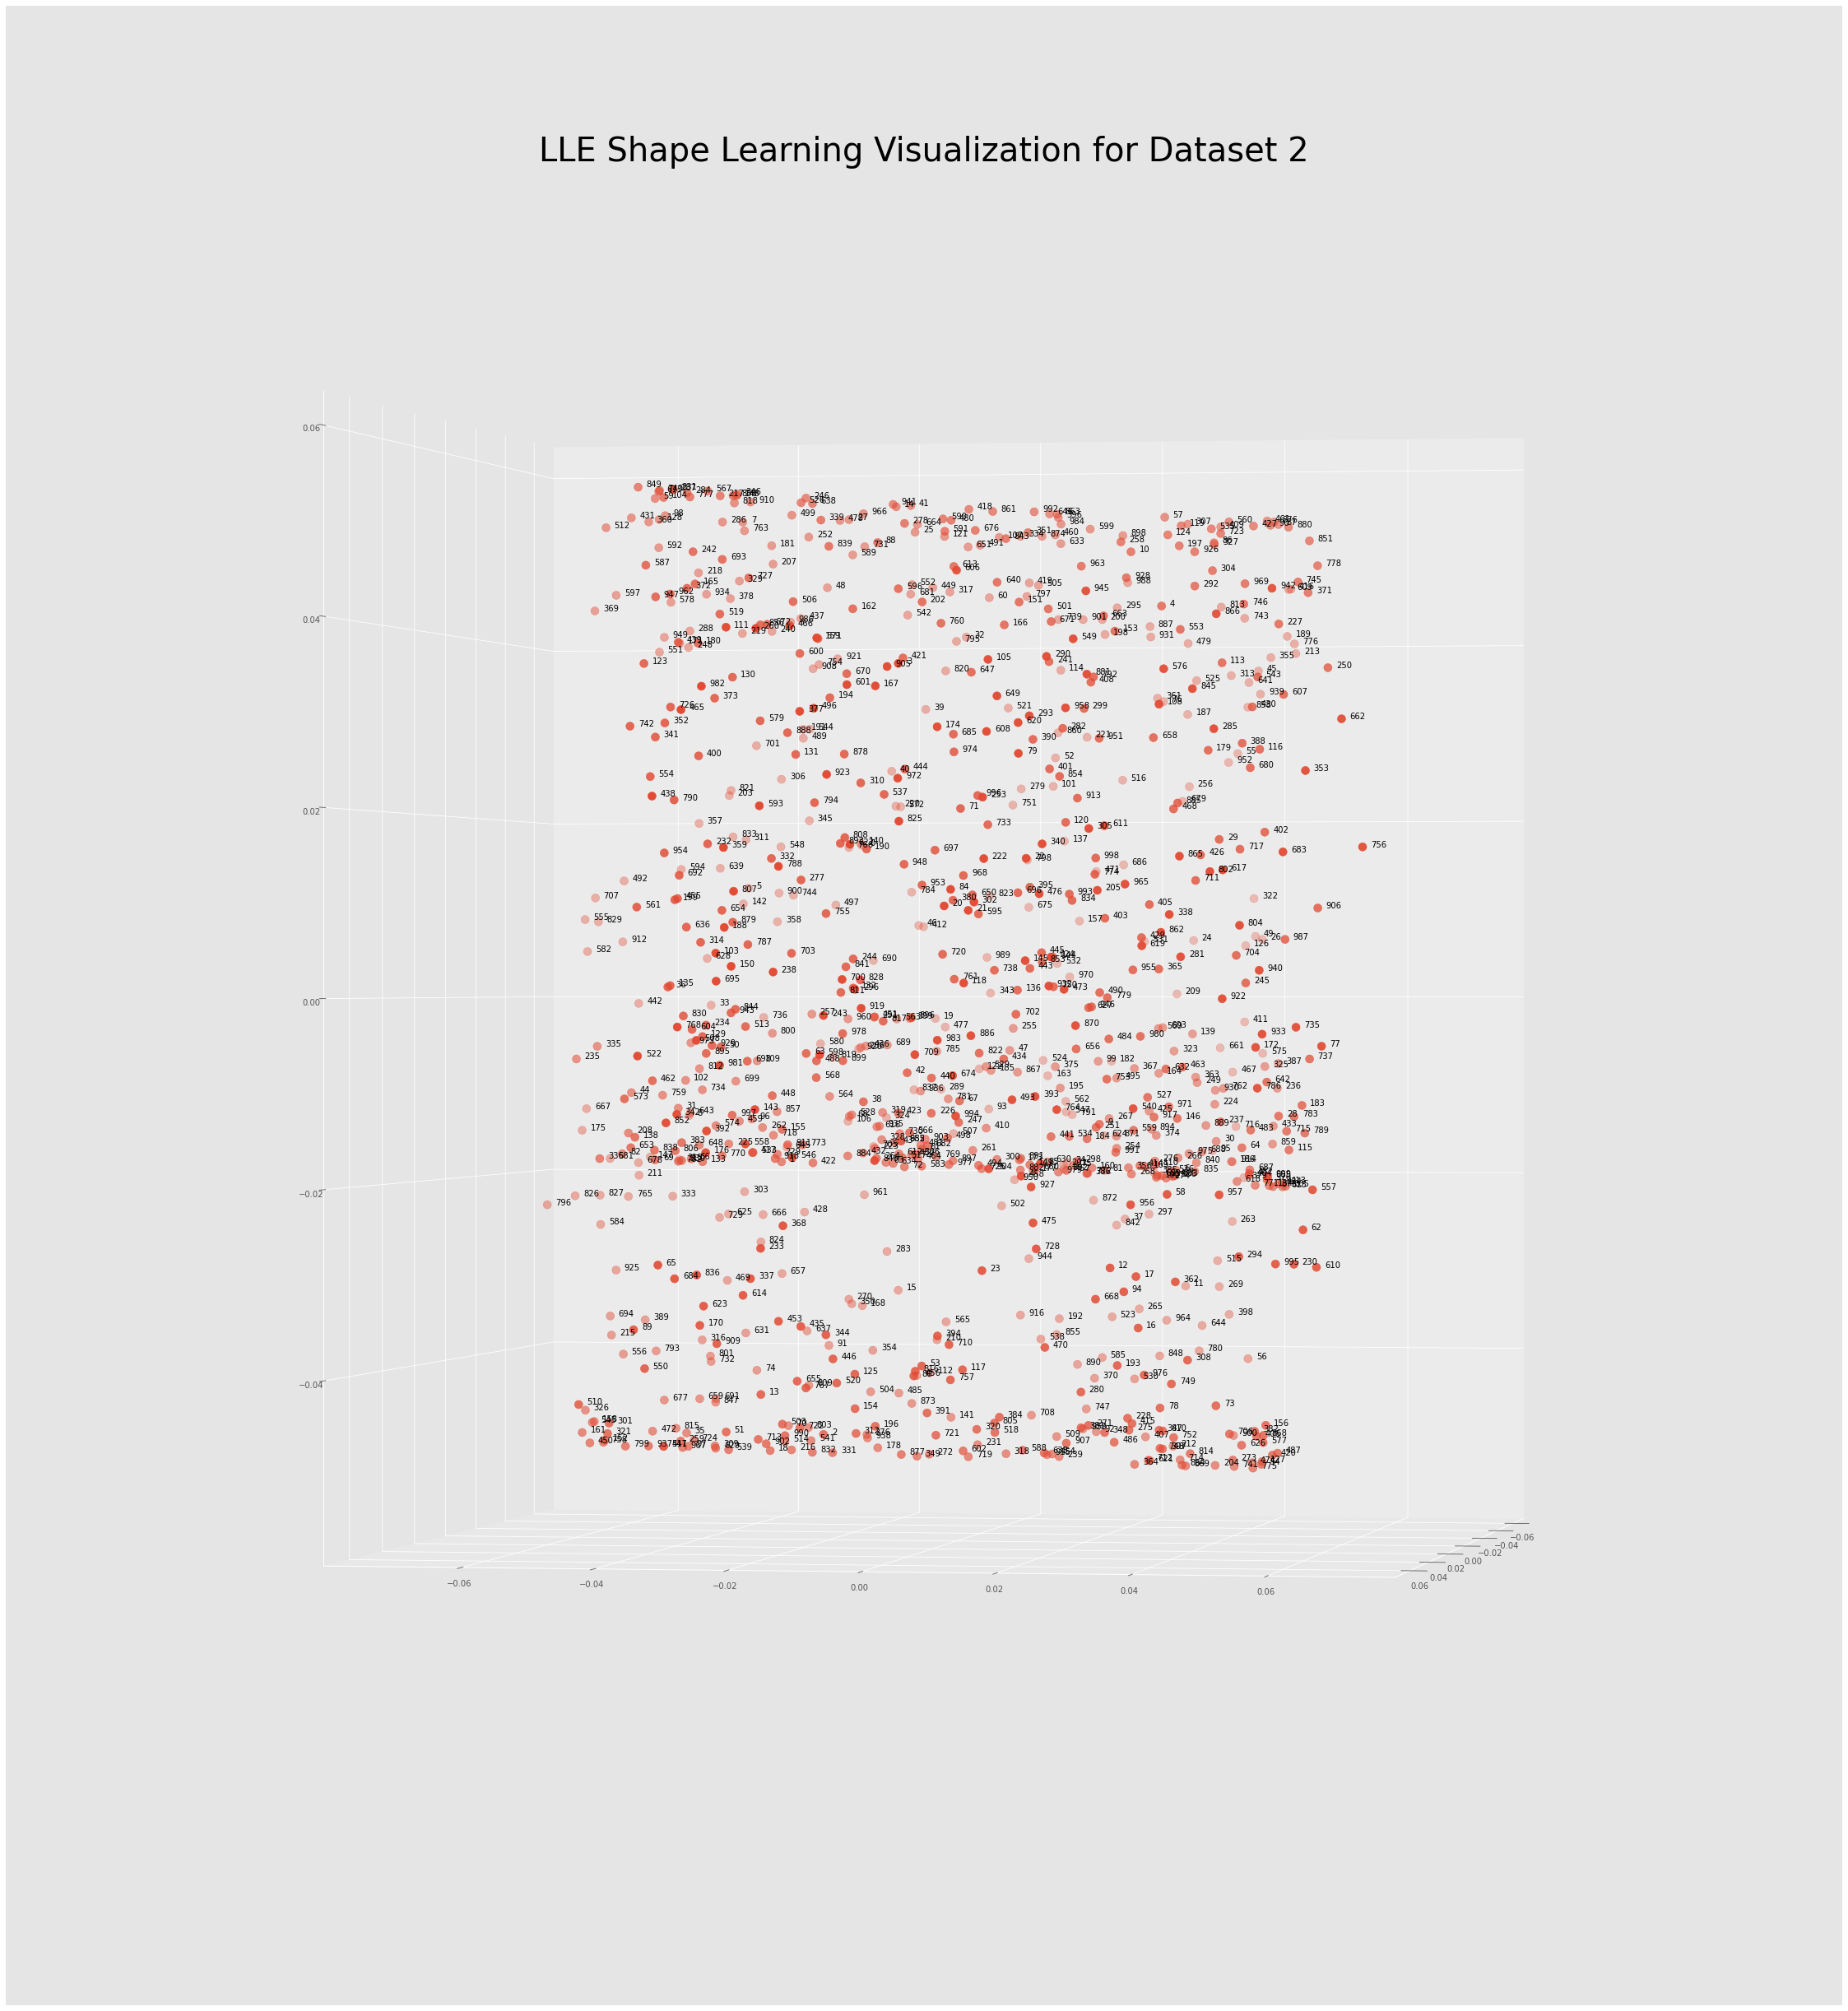

In [36]:
# LLE shape visualization
# cited from Non-linear dimension reduction (MDS); STA142B, UC Davis, W. Polonik

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(50)
fig.set_figwidth(40)

ax.view_init(elev=0, azim=10)

fig.subplots_adjust(top=0.8)

x = pd.Series(LLE_coords_Sym_2['p1'])
y = pd.Series(LLE_coords_Sym_2['p2'])
z = pd.Series(LLE_coords_Sym_2['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('LLE Shape Learning Visualization for Dataset 2', fontsize=40)

for k, v  in LLE_coords_Sym_2.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

**Note**: 

We can figure that the shape of the dataset 2 is like a **oil barrel** in both MDS and LLE. However, I'll change that to a 2D visualization for further visualization.

In [37]:
# MDS shape learning - 2D

MDS_embedding_2_2D = MDS(n_components=2, n_init=10, max_iter=500)
MDS_pred_2_2D = MDS_embedding_2_2D.fit_transform(shape_data_2)
MDS_coords_Sym_2_2D = pd.DataFrame(MDS_pred_2_2D, index=shape_data_2.index, columns=['p1','p2'])

In [38]:
# LLE shape learning - 2D

LLE_embedding_2_2D = LLE(n_components=2, n_neighbors=100)
LLE_pred_2_2D = LLE_embedding_2_2D.fit_transform(shape_data_2)
LLE_coords_Sym_2_2D = pd.DataFrame(LLE_pred_2_2D, index=shape_data_2.index, columns=['p1','p2'])

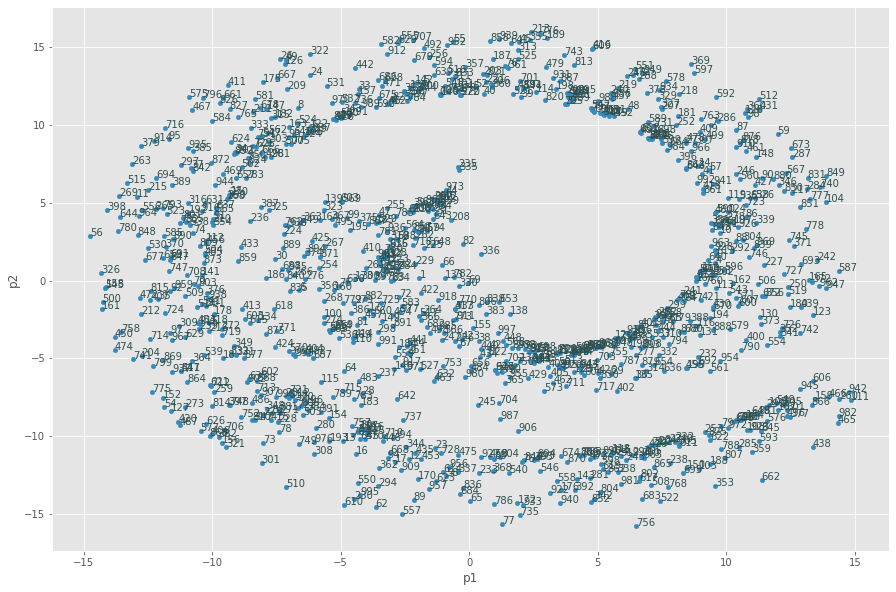

In [39]:
# MDS shape visualization - 2D

ax1 = MDS_coords_Sym_2_2D.plot('p1','p2', kind='scatter', figsize=(15, 10))
notshow = MDS_coords_Sym_2_2D.apply(annotate_df, axis=1)

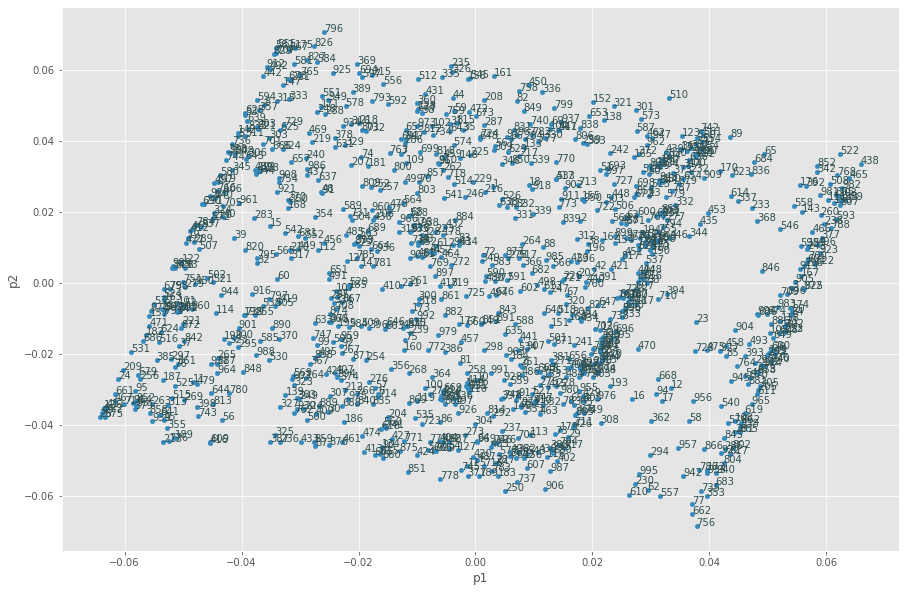

In [40]:
# LLE shape visualization - 2D

ax1 = LLE_coords_Sym_2_2D.plot('p1','p2', kind='scatter', figsize=(15, 10))
notshow = LLE_coords_Sym_2_2D.apply(annotate_df, axis=1)

**Dataset 2 Summary**:

Based on the 3-D and 2-D plots above, I confirmed the MDS gave the best shape of dataset 2, with 3-D to be a **oil barrel**, and 2-D to be a **spiral shape**; LLE prediction is hard to tell the shape. 

Dataset 3.

In [41]:
# MDS shape learning

MDS_embedding_3 = MDS(n_components=3, n_init=10, max_iter=500)
MDS_pred_3 = MDS_embedding_3.fit_transform(shape_data_3)
MDS_coords_Sym_3 = pd.DataFrame(MDS_pred_3, index=shape_data_3.index, columns=['p1','p2','p3'])

In [42]:
# LLE shape learning

LLE_embedding_3 = LLE(n_components=3, n_neighbors=100)
LLE_pred_3 = LLE_embedding_3.fit_transform(shape_data_3)
LLE_coords_Sym_3 = pd.DataFrame(LLE_pred_3, index=shape_data_3.index, columns=['p1','p2','p3'])

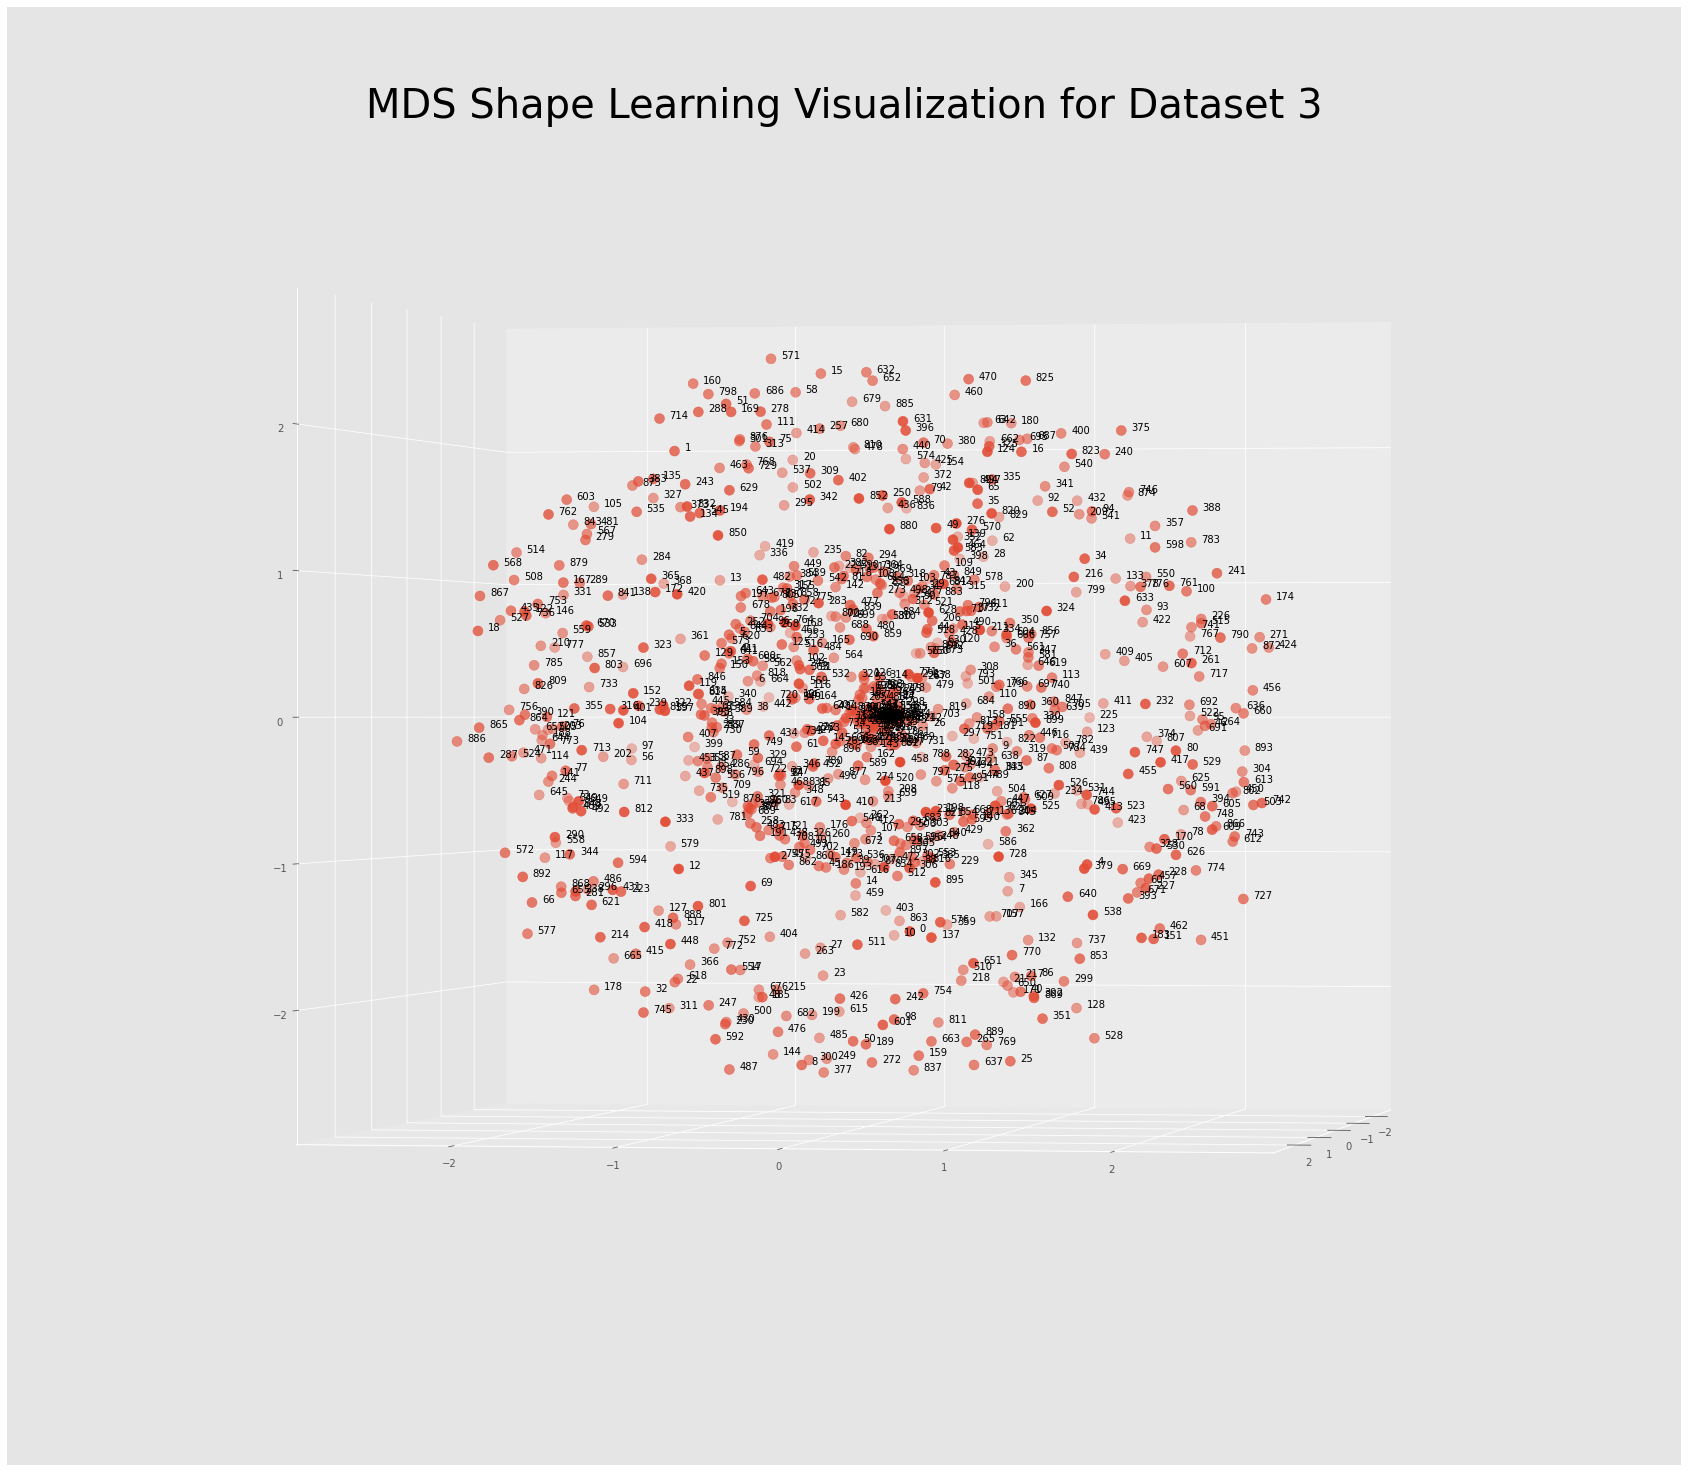

In [43]:
# MDS shape visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(30)
fig.set_figwidth(30)

ax.view_init(elev=0, azim=10)
              
fig.subplots_adjust(top=0.8)

x = pd.Series(MDS_coords_Sym_3['p1'])
y = pd.Series(MDS_coords_Sym_3['p2'])
z = pd.Series(MDS_coords_Sym_3['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('MDS Shape Learning Visualization for Dataset 3', fontsize=40)

for k, v  in MDS_coords_Sym_3.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

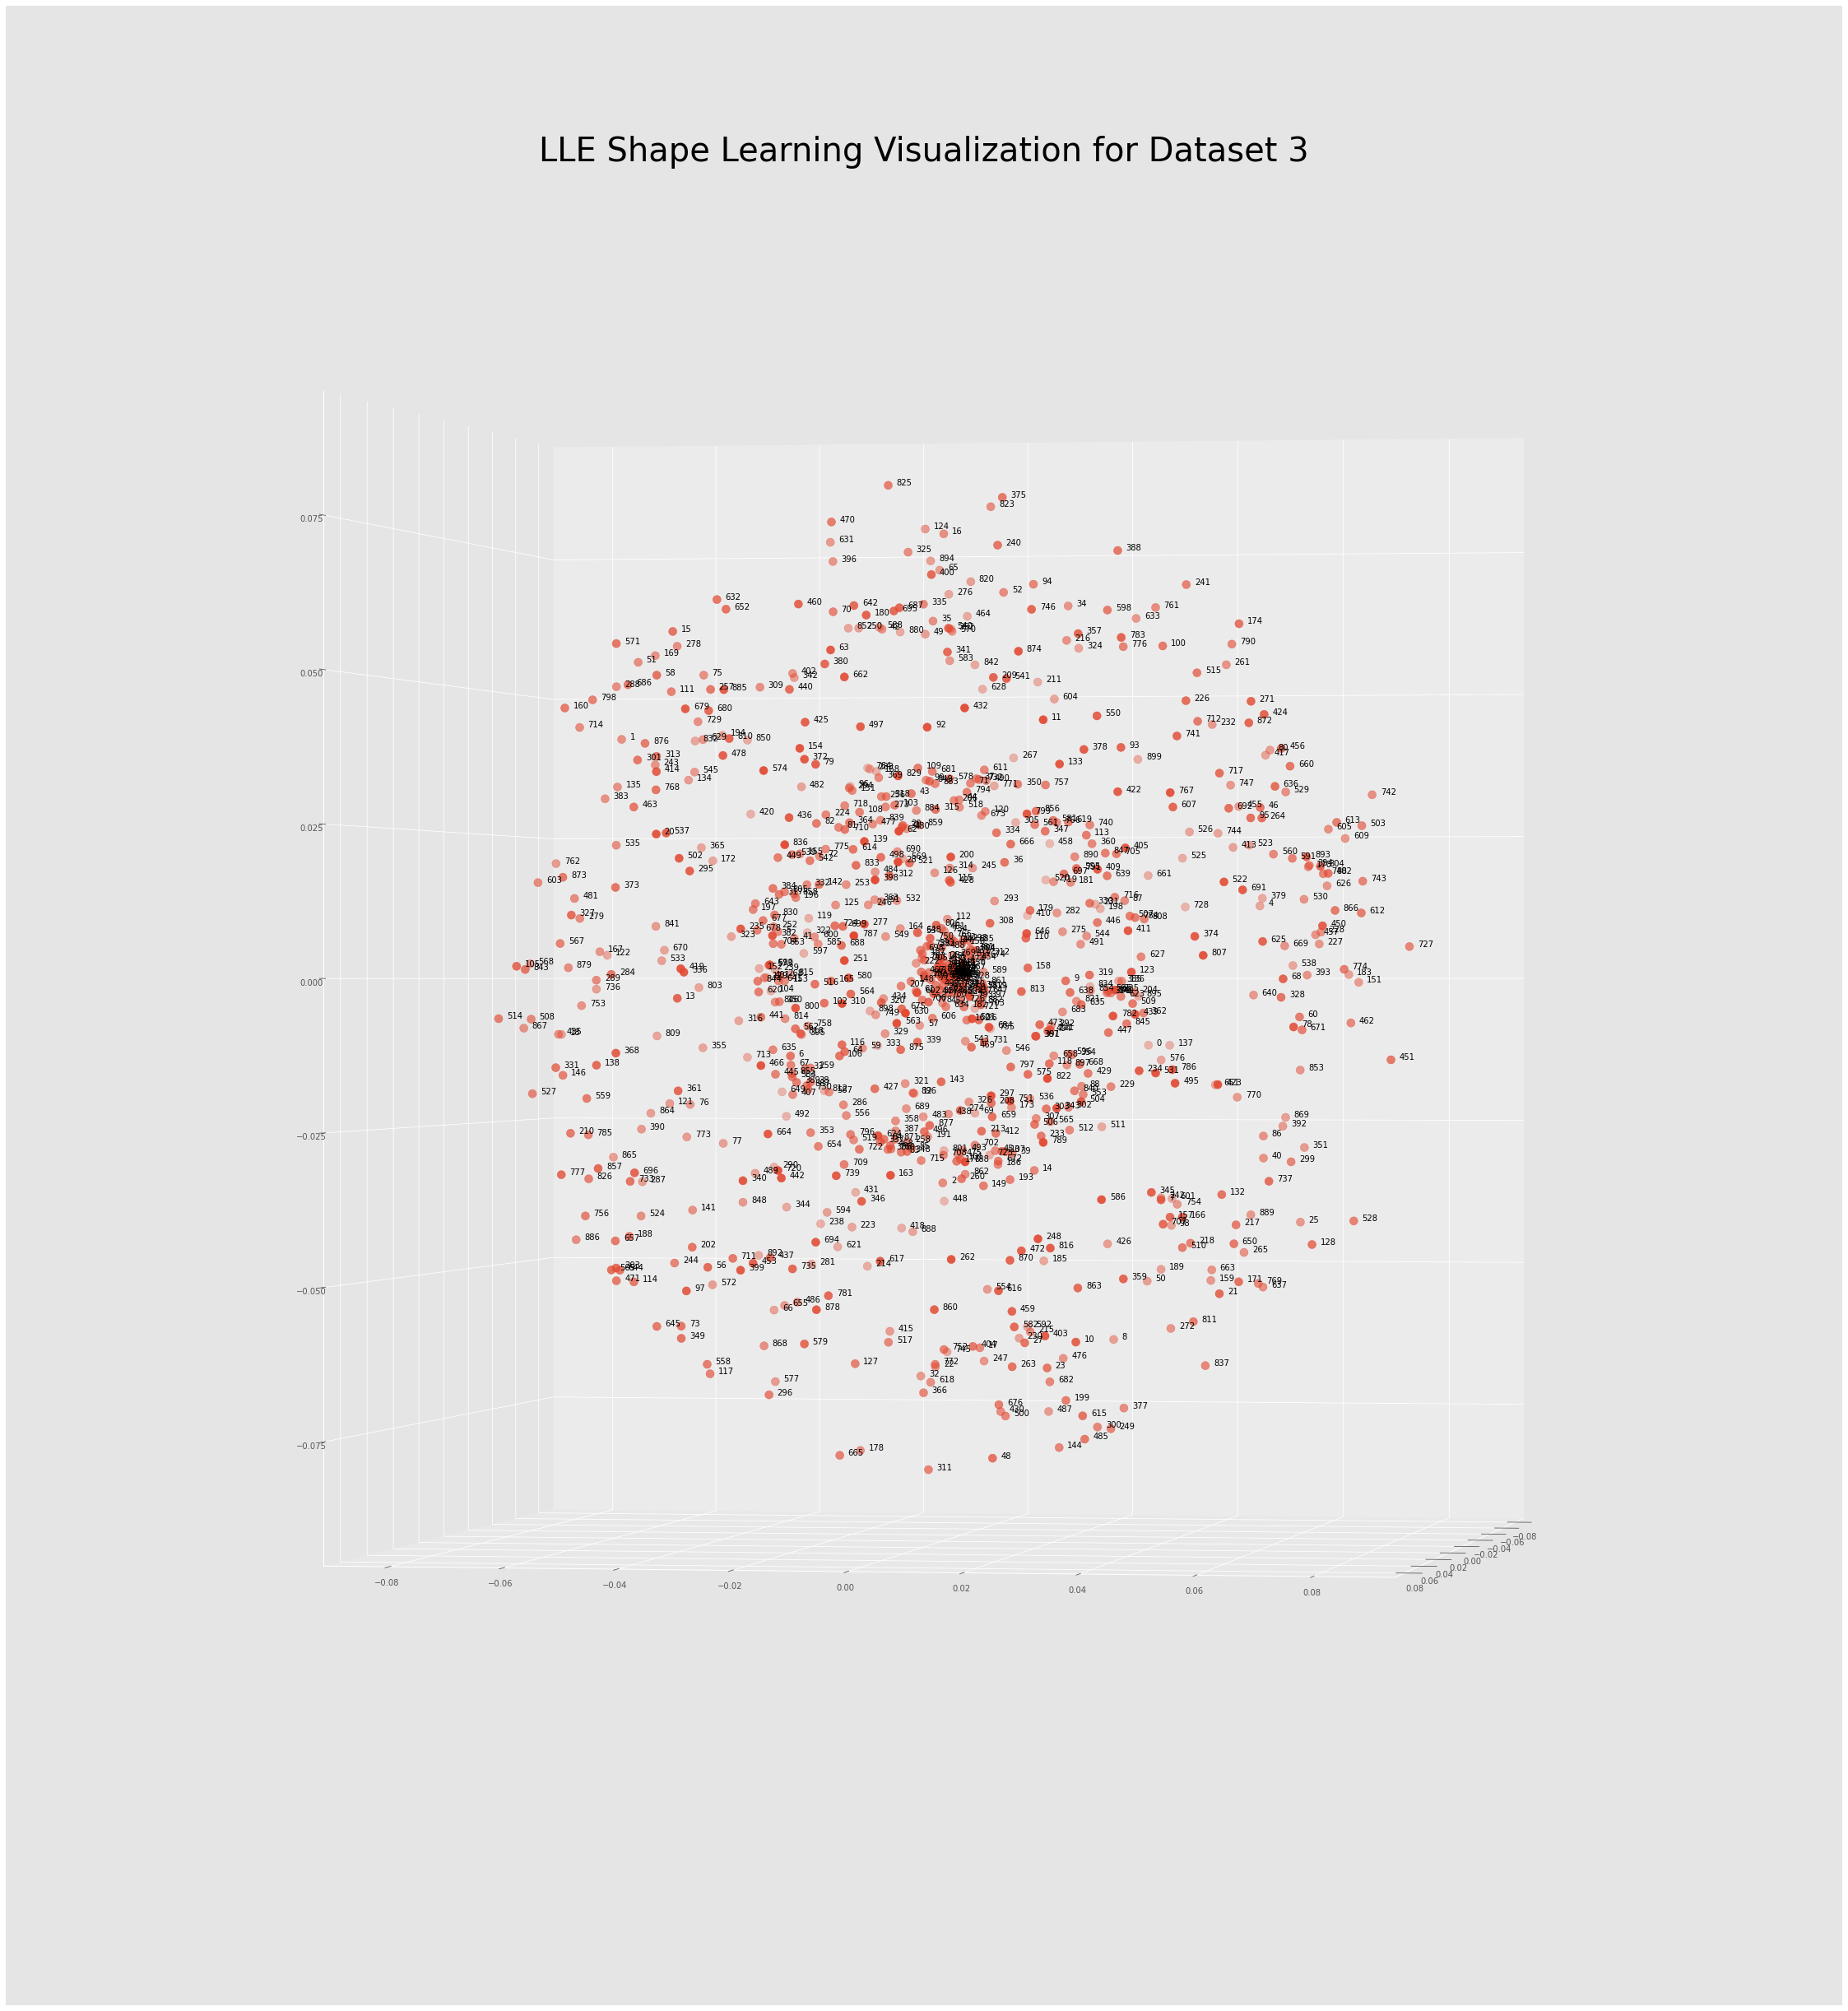

In [44]:
# LLE shape visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(50)
fig.set_figwidth(40)

ax.view_init(elev=0, azim=10)

fig.subplots_adjust(top=0.8)

x = pd.Series(LLE_coords_Sym_3['p1'])
y = pd.Series(LLE_coords_Sym_3['p2'])
z = pd.Series(LLE_coords_Sym_3['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('LLE Shape Learning Visualization for Dataset 3', fontsize=40)

for k, v  in LLE_coords_Sym_3.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

**Dataset 3 Summary**:

Both MDS and LLE showed to predict an **eyeball shape** for dataset 3.

Dataset 4.

In [45]:
# MDS shape learning

MDS_embedding_4 = MDS(n_components=3, random_state=1, n_init=10, max_iter=500)
MDS_pred_4 = MDS_embedding_4.fit_transform(shape_data_4)
MDS_coords_Sym_4 = pd.DataFrame(MDS_pred_4, index=shape_data_4.index, columns=['p1','p2','p3'])

In [46]:
# LLE shape learning

LLE_embedding_4 = LLE(n_components=3, n_neighbors=100)
LLE_pred_4 = LLE_embedding_4.fit_transform(shape_data_4)
LLE_coords_Sym_4 = pd.DataFrame(LLE_pred_4, index=shape_data_4.index, columns=['p1','p2','p3'])

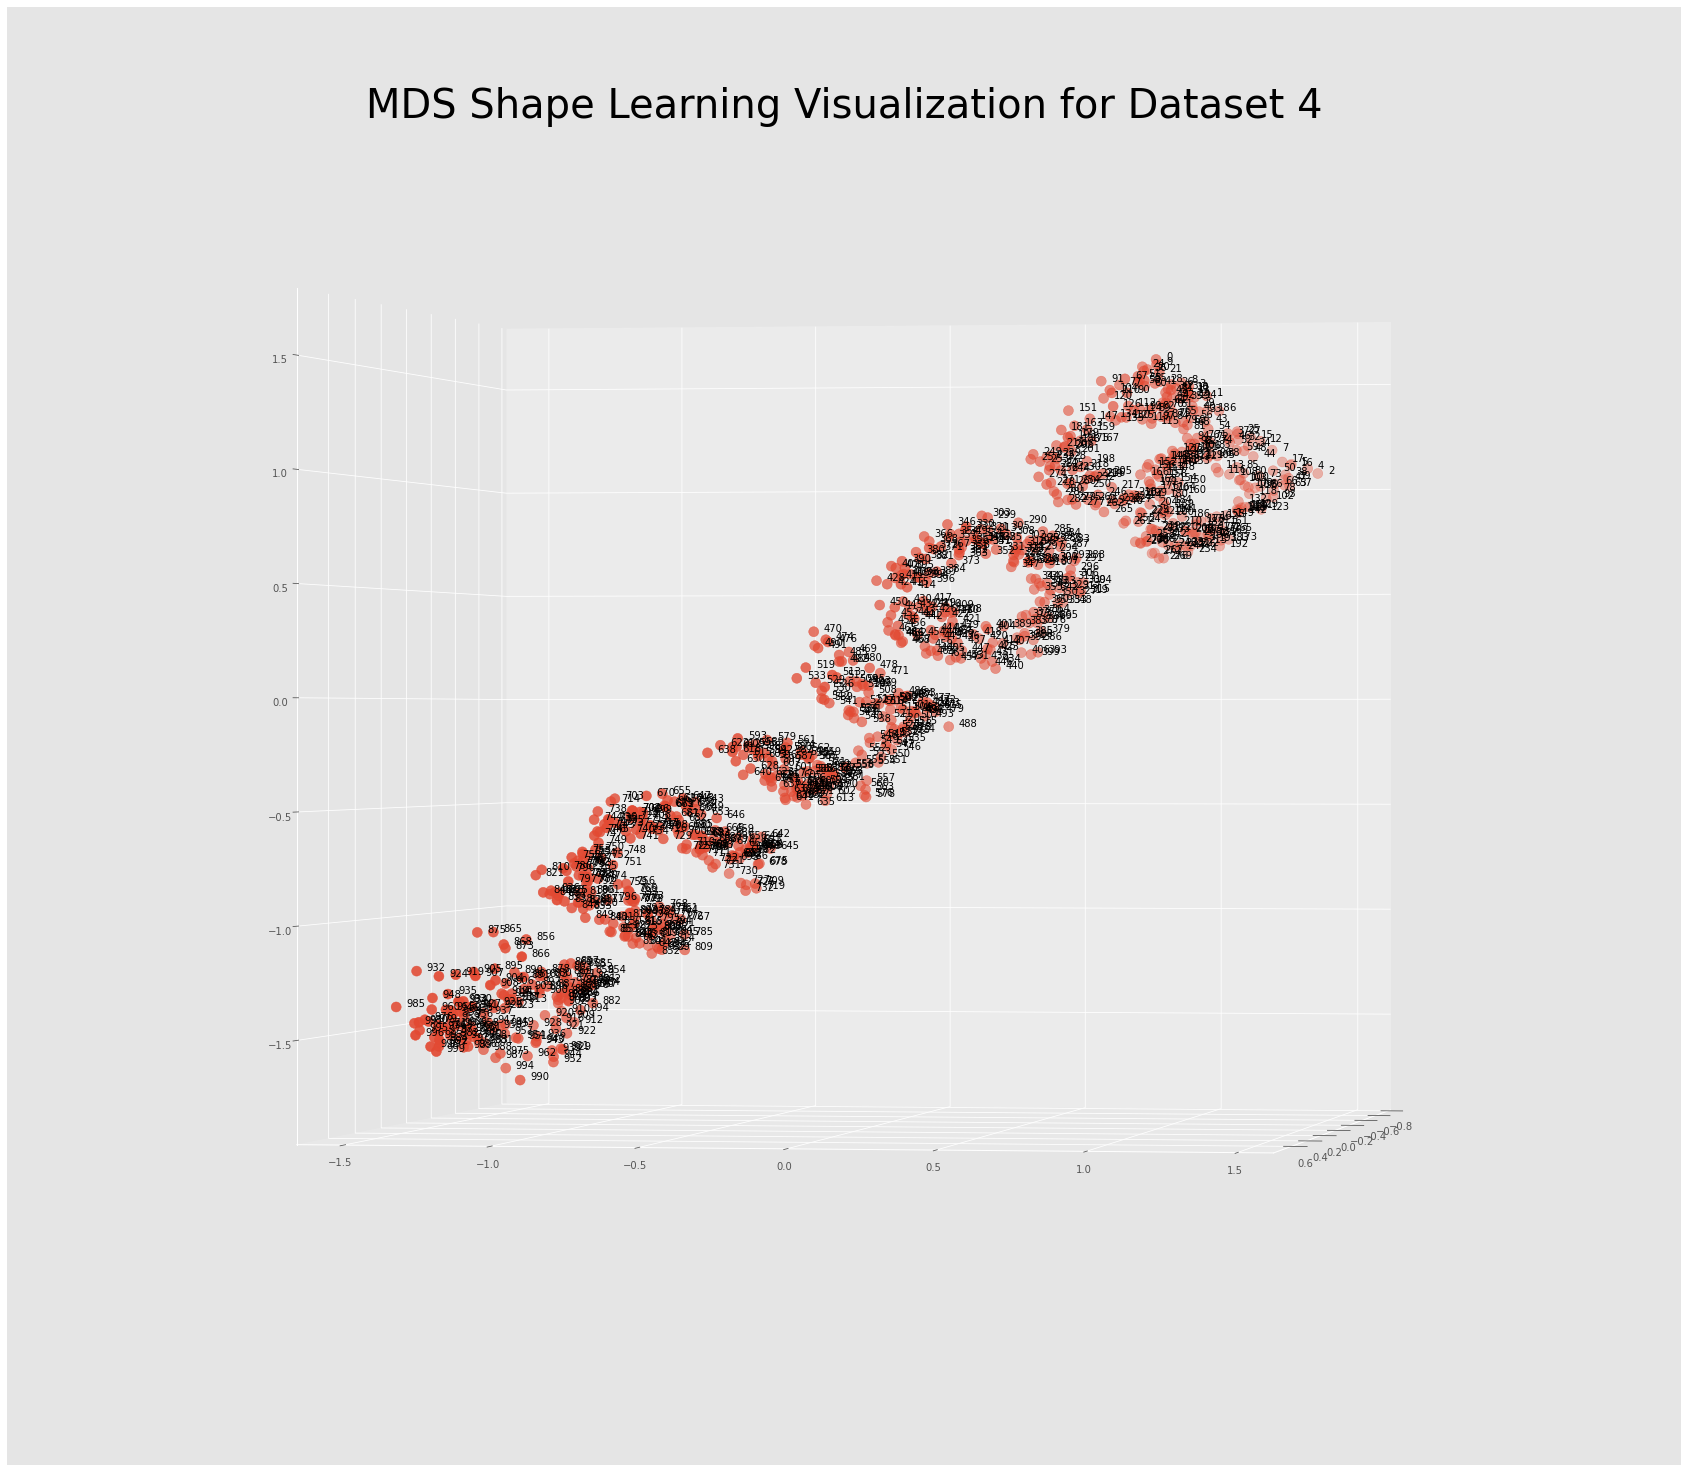

In [47]:
# MDS shape visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(30)
fig.set_figwidth(30)

ax.view_init(elev=0, azim=10)
              
fig.subplots_adjust(top=0.8)

x = pd.Series(MDS_coords_Sym_4['p1'])
y = pd.Series(MDS_coords_Sym_4['p2'])
z = pd.Series(MDS_coords_Sym_4['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('MDS Shape Learning Visualization for Dataset 4', fontsize=40)

for k, v  in MDS_coords_Sym_4.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

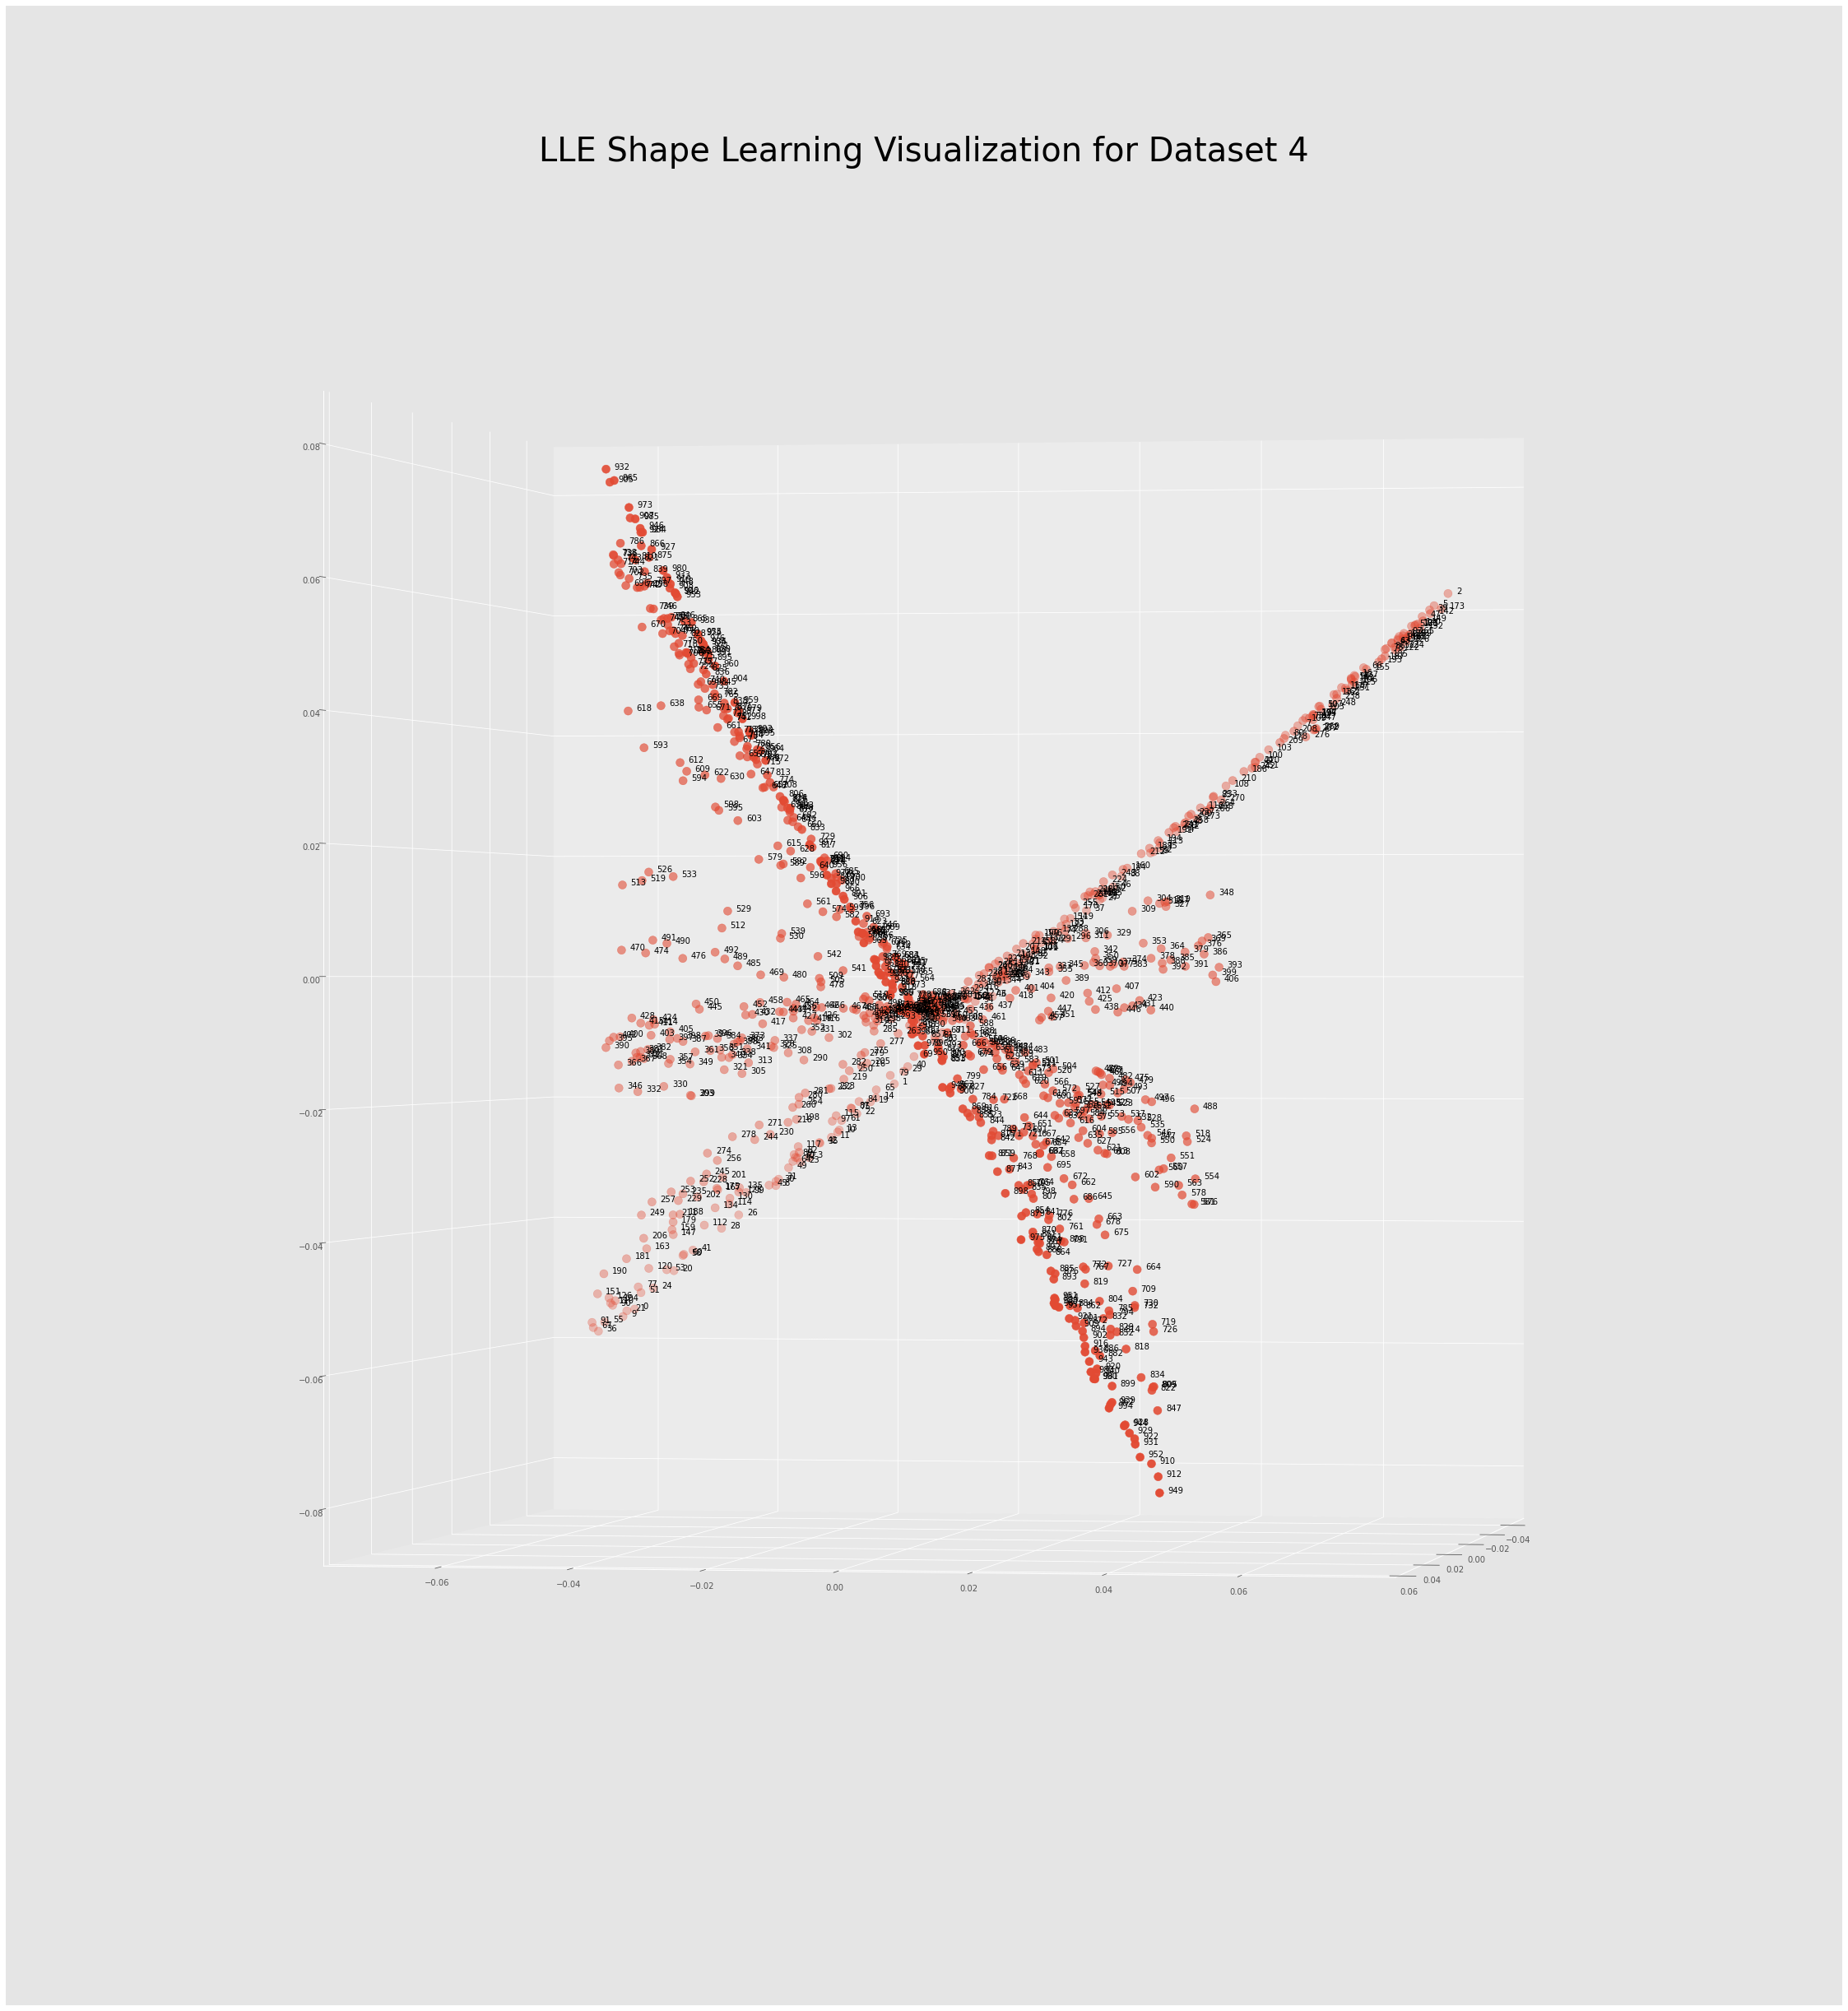

In [48]:
# LLE shape visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(50)
fig.set_figwidth(40)

ax.view_init(elev=0, azim=10)

fig.subplots_adjust(top=0.8)

x = pd.Series(LLE_coords_Sym_4['p1'])
y = pd.Series(LLE_coords_Sym_4['p2'])
z = pd.Series(LLE_coords_Sym_4['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('LLE Shape Learning Visualization for Dataset 4', fontsize=40)

for k, v  in LLE_coords_Sym_4.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

**Dataset 4 Summary**:

From the above plots, I saw MDS showed a **"BONUS"** shape for dataset 4; while LLE is completely showed bad predictive shape. 

Dataset 5.

In [49]:
# MDS shape learning

MDS_embedding_5 = MDS(n_components=3, random_state=1, n_init=10, max_iter=500)
MDS_pred_5 = MDS_embedding_5.fit_transform(shape_data_5)
MDS_coords_Sym_5 = pd.DataFrame(MDS_pred_5, index=shape_data_5.index, columns=['p1','p2','p3'])

In [50]:
# LLE shape learning

LLE_embedding_5 = LLE(n_components=3, n_neighbors=100)
LLE_pred_5 = LLE_embedding_5.fit_transform(shape_data_5)
LLE_coords_Sym_5 = pd.DataFrame(LLE_pred_5, index=shape_data_5.index, columns=['p1','p2','p3'])

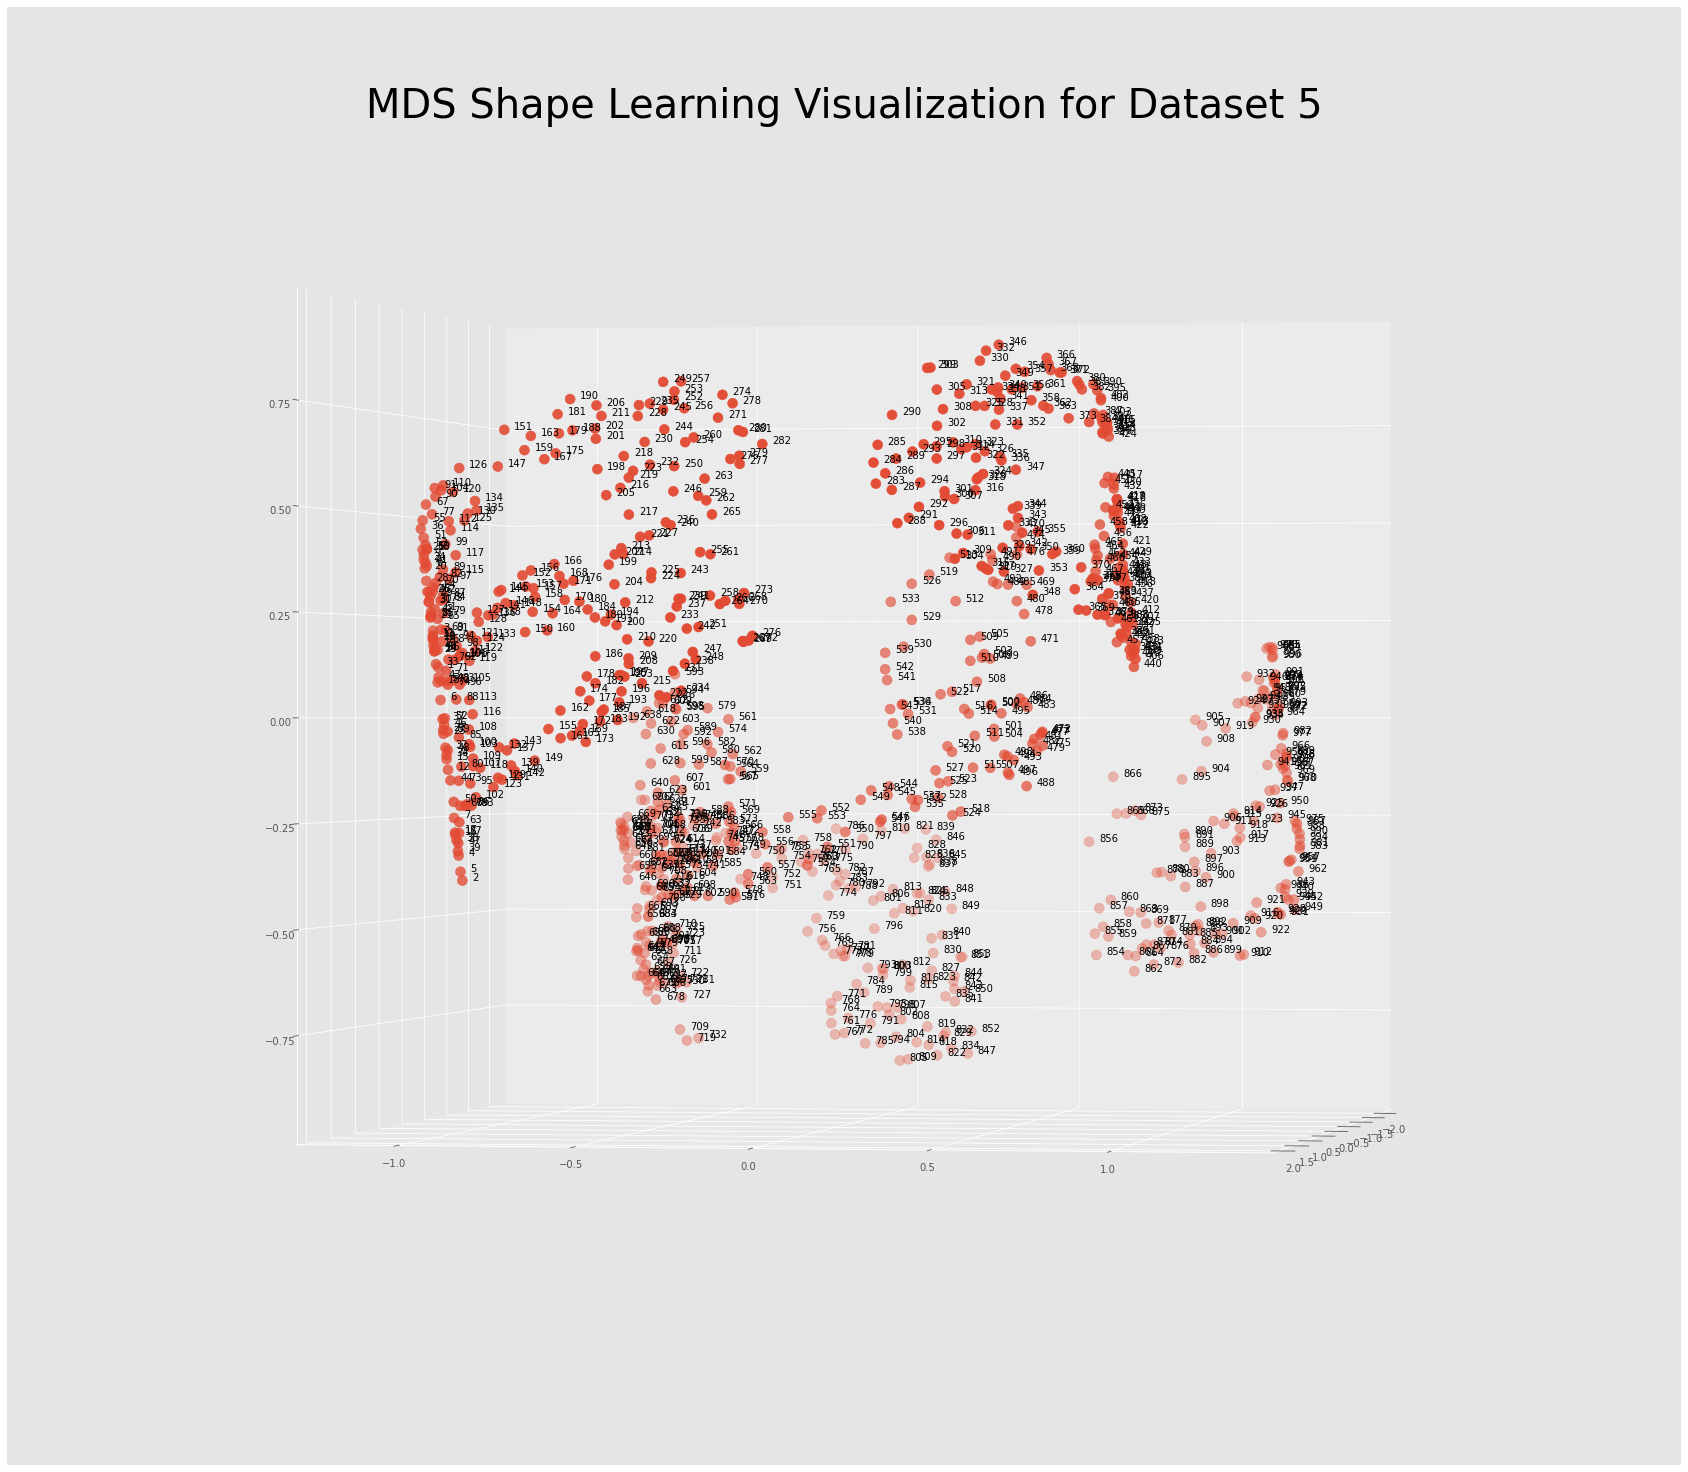

In [51]:
# MDS shape visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(30)
fig.set_figwidth(30)

ax.view_init(elev=0, azim=10)
              
fig.subplots_adjust(top=0.8)

x = pd.Series(MDS_coords_Sym_5['p1'])
y = pd.Series(MDS_coords_Sym_5['p2'])
z = pd.Series(MDS_coords_Sym_5['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('MDS Shape Learning Visualization for Dataset 5', fontsize=40)

for k, v  in MDS_coords_Sym_5.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

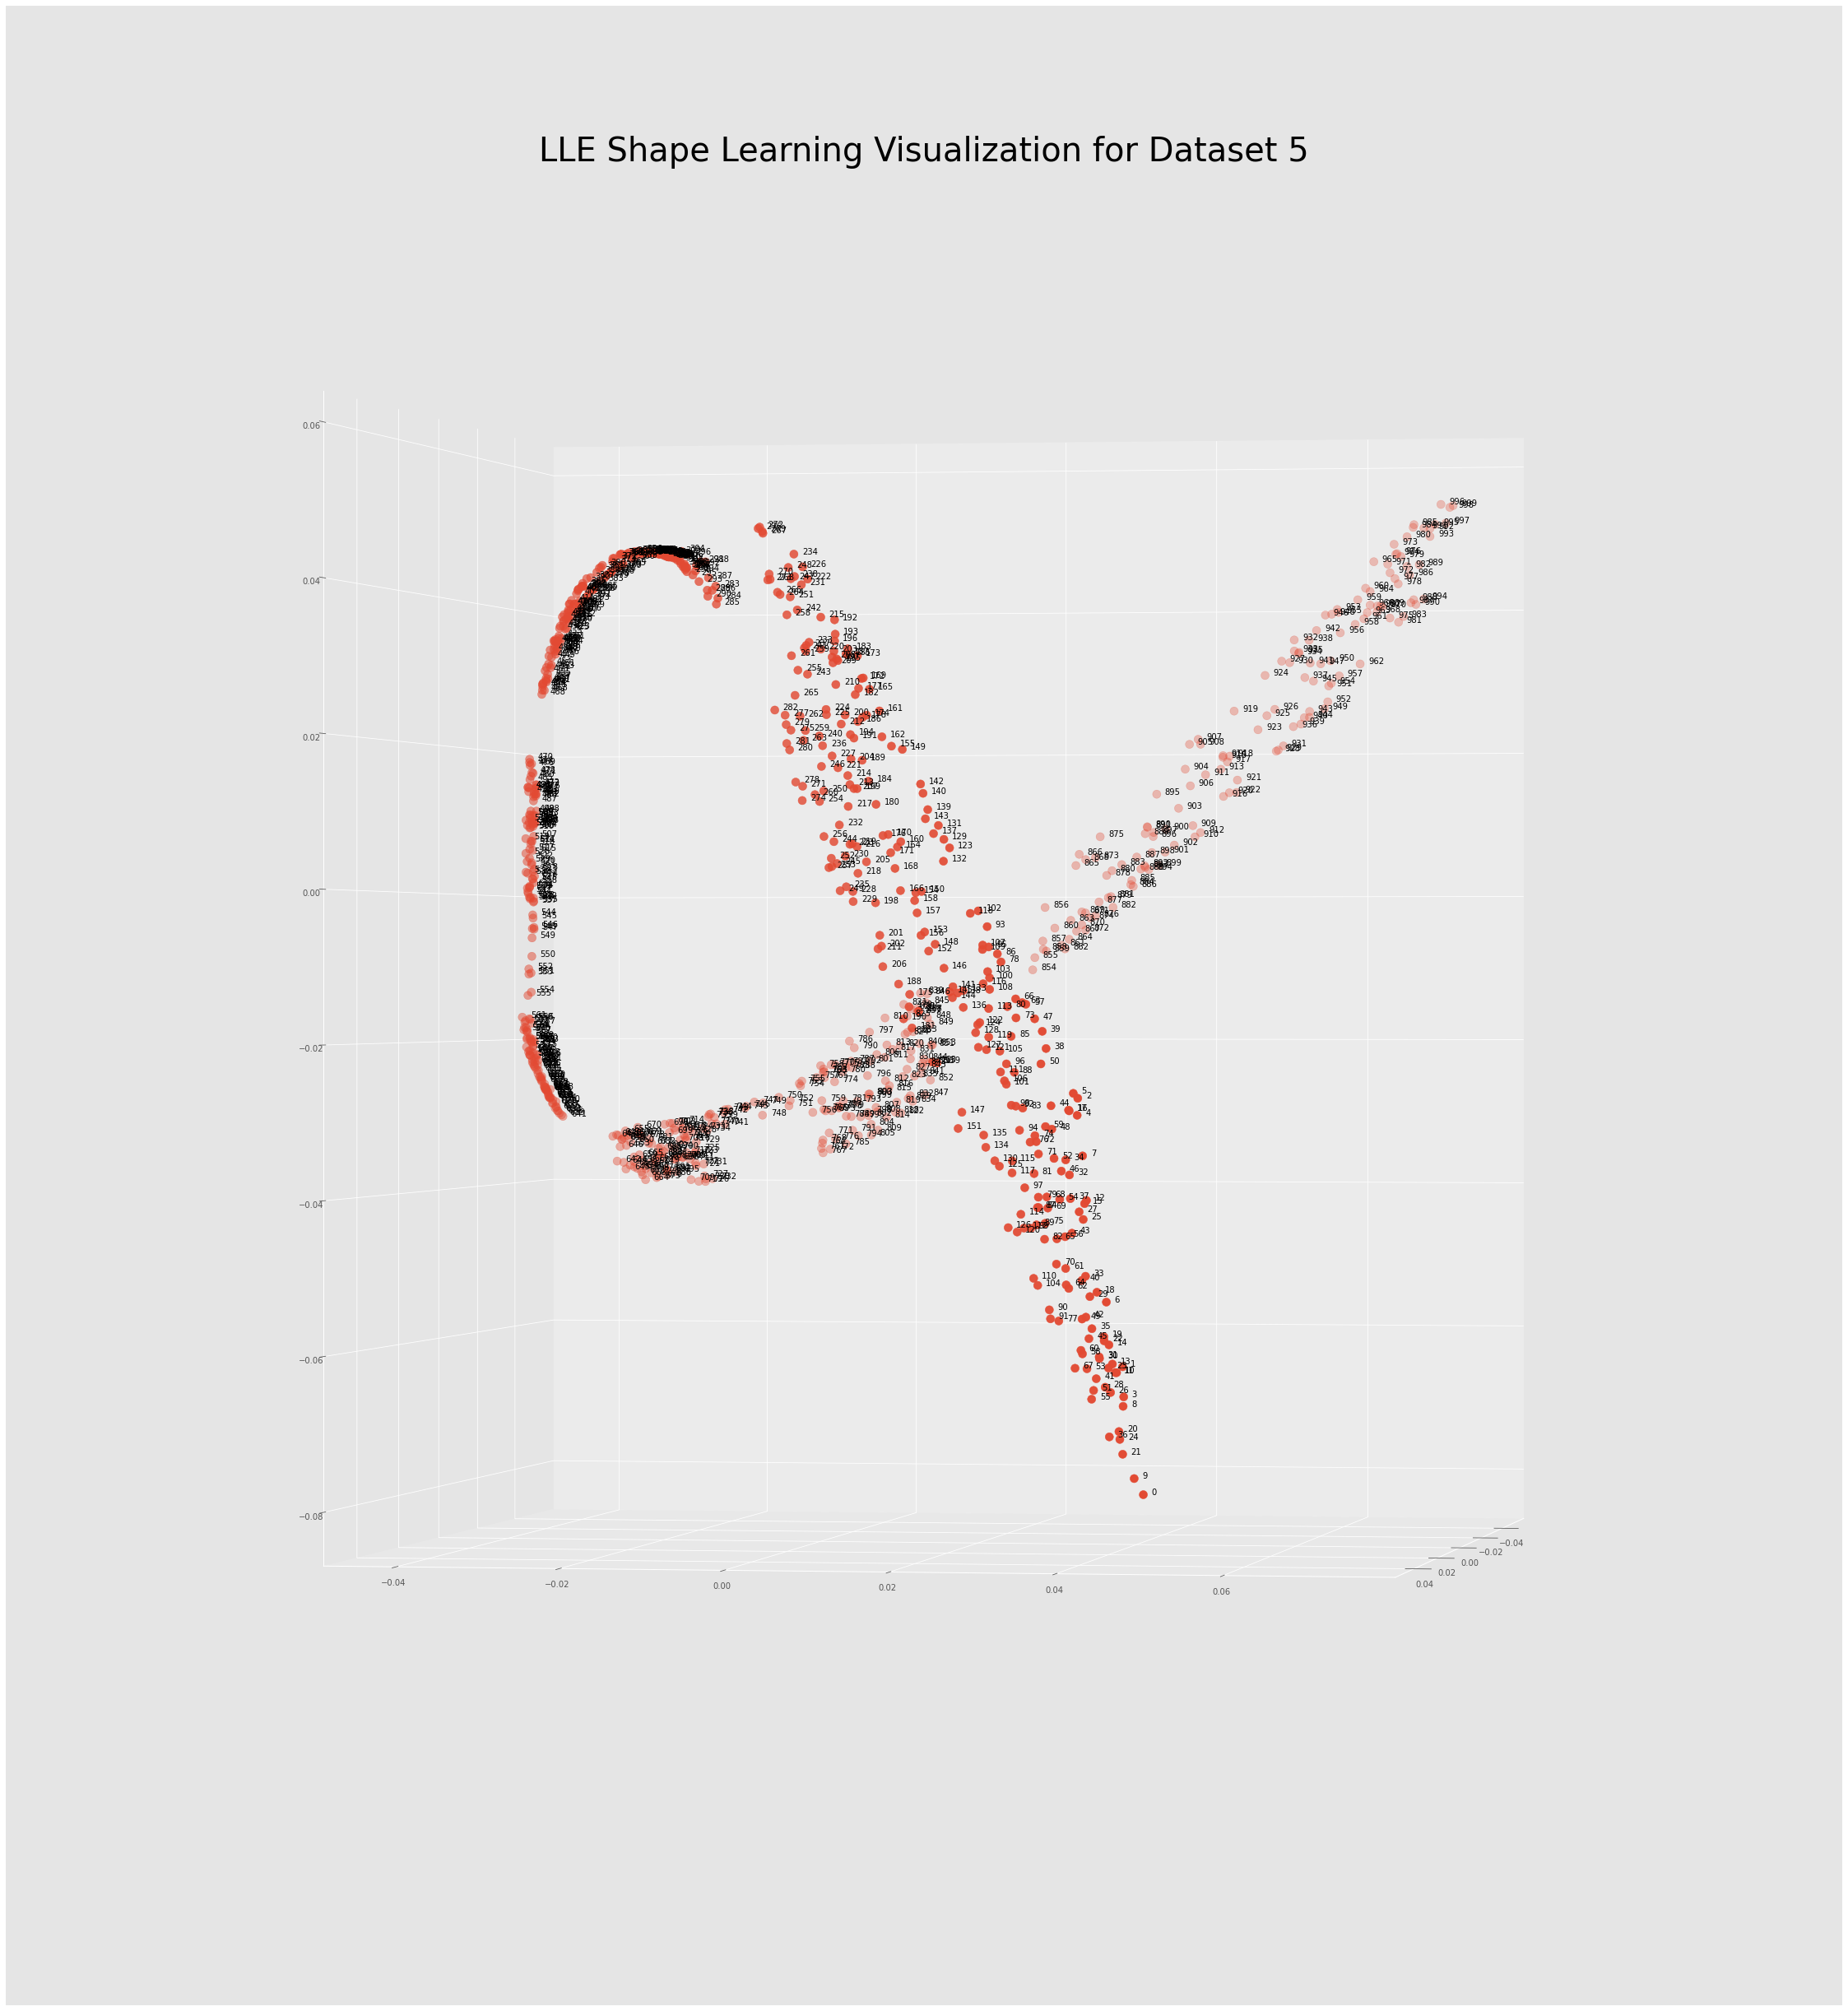

In [52]:
# LLE shape visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.set_figheight(50)
fig.set_figwidth(40)

ax.view_init(elev=0, azim=10)

fig.subplots_adjust(top=0.8)

x = pd.Series(LLE_coords_Sym_5['p1'])
y = pd.Series(LLE_coords_Sym_5['p2'])
z = pd.Series(LLE_coords_Sym_5['p3'])

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x,y,z, s = 100) 
ax.set_title('LLE Shape Learning Visualization for Dataset 5', fontsize=40)

for k, v  in LLE_coords_Sym_5.T.iteritems():
    annotate3D(s = k, xyz = v,
                xytext=(10,0), textcoords='offset points', ax = ax,
                family='sans-serif', fontsize=10)

**Note**:

The above 3-D plots are not clear enough to draw a conclusion about the shape of dataset 1; I'll try some 2D visualization. 

In [53]:
# MDS shape learning - 2D

MDS_embedding_5_2D = MDS(n_components=2, n_init=10, max_iter=500)
MDS_pred_5_2D = MDS_embedding_5_2D.fit_transform(shape_data_5)
MDS_coords_Sym_5_2D = pd.DataFrame(MDS_pred_5_2D, index=shape_data_5.index, columns=['p1','p2'])

In [54]:
# LLE shape learning - 2D

LLE_embedding_5_2D = LLE(n_components=2, n_neighbors=100)
LLE_pred_5_2D = LLE_embedding_5_2D.fit_transform(shape_data_5)
LLE_coords_Sym_5_2D = pd.DataFrame(LLE_pred_5_2D, index=shape_data_5.index, columns=['p1','p2'])

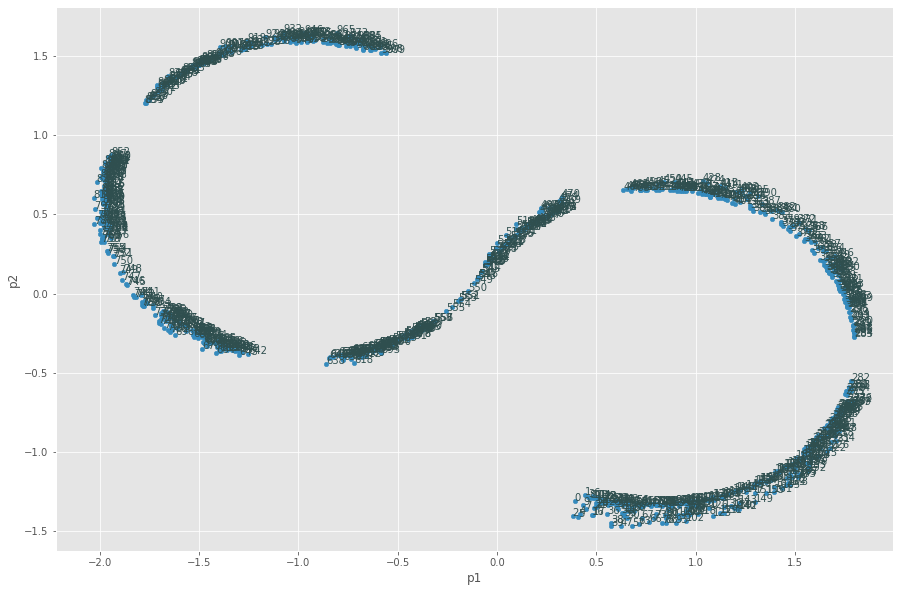

In [55]:
# MDS shape visualization - 2D

ax1 = MDS_coords_Sym_5_2D.plot('p1','p2', kind='scatter', figsize=(15, 10))
notshow = MDS_coords_Sym_5_2D.apply(annotate_df, axis=1)

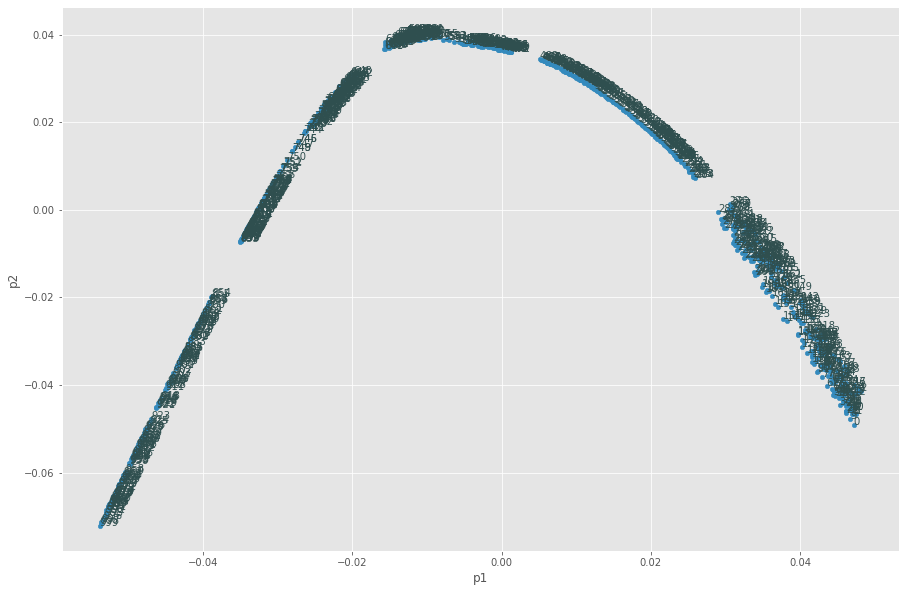

In [56]:
# LLE shape visualization - 2D

ax1 = LLE_coords_Sym_5_2D.plot('p1','p2', kind='scatter', figsize=(15, 10))
notshow = LLE_coords_Sym_5_2D.apply(annotate_df, axis=1)

**Dataset 5 Summary**:

From the above plots, I can draw an conclusion that MDS showed a **"S"** shape curve with low density area; while LLE showed a **"U"** shape with low density area.

## Part 5. Multi-dimensional Scaling and PCA

This is a continuation problem of the part 5 in project 2. Use Multi-dimensional Scaling to plot the points in data2 and label your clusters by different colors (set k=7 in k-means). Use PCA to do the same thing.

**For this question, I saved the data from part 5 in project 2 to be data2.csv for this Part.**

In [57]:
# load packages for Part 5
from sklearn.decomposition import PCA

In [58]:
filename='./data/data2.csv'
df = pd.read_csv(filename)

In [59]:
# Perfrom K-Means to get True labels 

kmeans_mds_model = KMeans(n_clusters = 7, max_iter = 500, tol = 0.0001)
kmeans_mds_pred = kmeans_mds_model.fit(df)
kmeans_mds_labels = kmeans_mds_pred.labels_

In [60]:
# Perform MDS 

MDS_embedding_6 = MDS(n_components=2, random_state=1, n_init=10, max_iter=500)
MDS_pred_6 = MDS_embedding_6.fit_transform(df)
MDS_coords_Sym_6 = pd.DataFrame(MDS_pred_6, index=df.index, columns=['p1','p2'])

In [61]:
# Perform PCA

model_PCA = PCA(n_components=2)
PCA_pred = model_PCA.fit_transform(df)

Text(0.5, 1.0, 'PCA: Clustering Visualization')

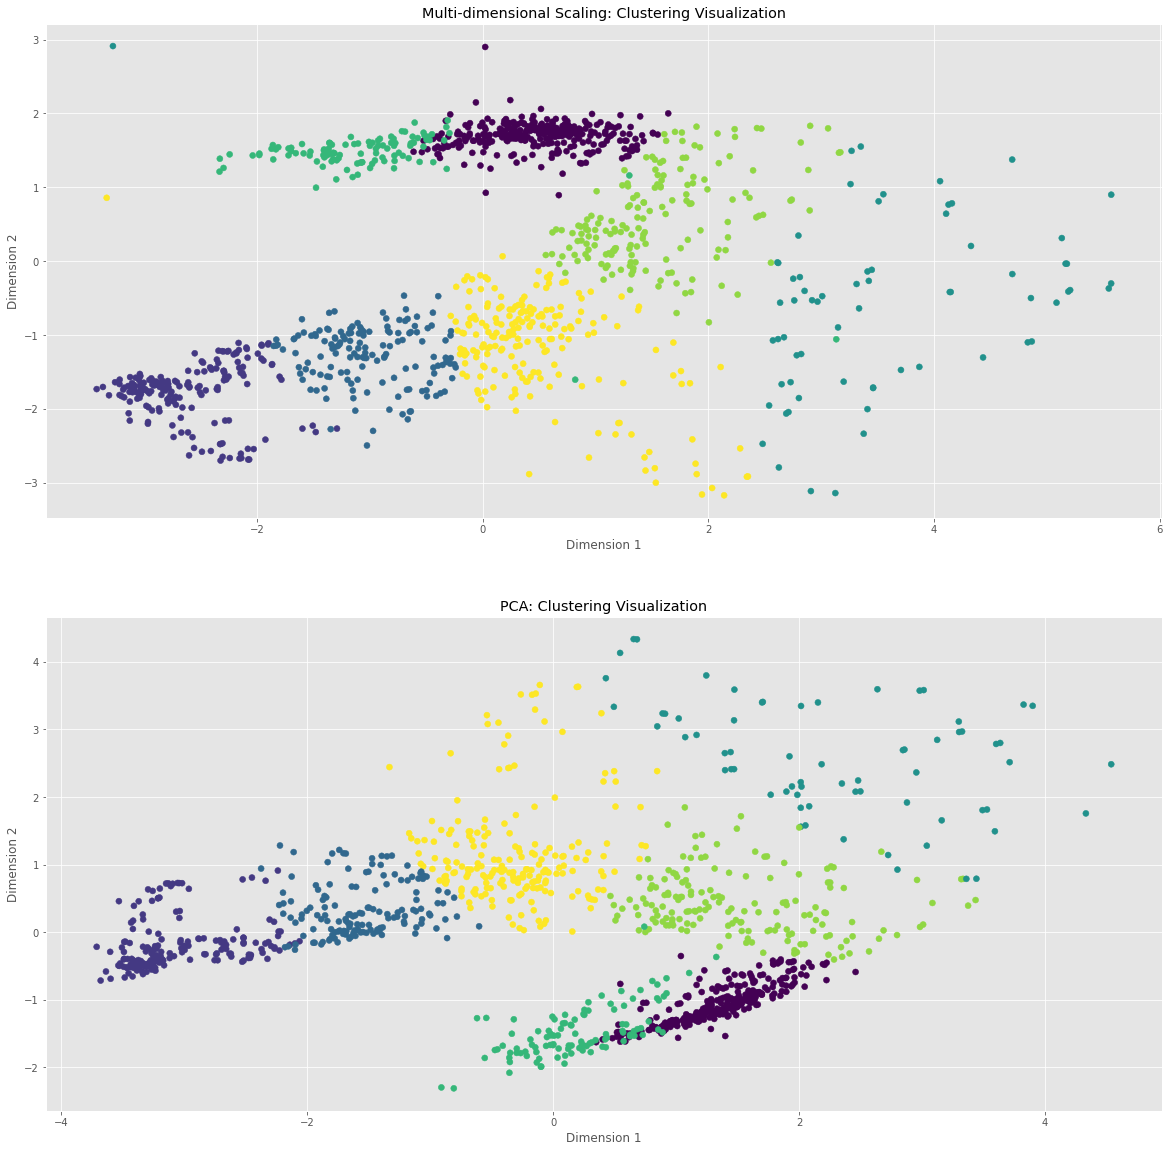

In [62]:
# Visualization of MDS and PCA
plt.figure(figsize = (20, 20))
plt.subplot(2, 1, 1)
plt.scatter(MDS_coords_Sym_6['p1'], MDS_coords_Sym_6['p2'], marker='o', c = kmeans_mds_labels)
plt.xlabel("Dimension 1", size=12)
plt.ylabel("Dimension 2", size=12)
plt.title("Multi-dimensional Scaling: Clustering Visualization")

plt.subplot(2, 1, 2)
plt.scatter(PCA_pred[:, 0], PCA_pred[:, 1], marker='o', c = kmeans_mds_labels)
plt.xlabel("Dimension 1", size=12)
plt.ylabel("Dimension 2", size=12)
plt.title("PCA: Clustering Visualization")

# <font color="blue"> Submit your notebook and a pdf version of it on canvas.</font>